# Importing required libraries



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the data


In [2]:
#taking the data from the dataset folder
df = pd.read_csv("../dataset/fraud.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498121 entries, 0 to 498120
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   trustLevel                 498121 non-null  int64  
 1   totalScanTimeInSeconds     498121 non-null  int64  
 2   grandTotal                 498121 non-null  float64
 3   lineItemVoids              498121 non-null  int64  
 4   scansWithoutRegistration   498121 non-null  int64  
 5   quantityModifications      498121 non-null  int64  
 6   scannedLineItemsPerSecond  498121 non-null  float64
 7   valuePerSecond             498121 non-null  float64
 8   lineItemVoidsPerPosition   498121 non-null  float64
 9   fraud                      498121 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 38.0 MB


# Initial Data Analysis


In [3]:
# first 5 rows of the dataset
df.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429,0
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259,0
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000,0
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857,0
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526,0


In [4]:
# checking for null values
df.isnull().sum()
#data looks quite clean for the initial analysis

trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64

In [5]:
#Checking if rows exists where cells are NaN
df[df.isnull().any(axis=1)]


,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud


In [6]:
# checking for the unique values in the dataset
df.nunique()

trustLevel                        6
totalScanTimeInSeconds         1831
grandTotal                    10000
lineItemVoids                    12
scansWithoutRegistration         11
quantityModifications             6
scannedLineItemsPerSecond     33663
valuePerSecond               407021
lineItemVoidsPerPosition        216
fraud                             2
dtype: int64

In [7]:
# checking for the distribution of the target variable
df['fraud'].value_counts()

fraud
0    474394
1     23727
Name: count, dtype: int64

In [8]:
#Statistical summary of the dataset
df.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000
mean,3.503257,915.608772,49.988990,5.495926,5.001281,2.499015,0.068054,0.222182,0.735189,0.047633
std,1.707662,528.772880,28.873426,3.447683,3.163795,1.708182,0.521092,1.717867,1.320235,0.212989
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000546,0.000000,0.000000,0.000000
25%,2.000000,458.000000,24.930000,3.000000,2.000000,1.000000,0.008682,0.027348,0.160000,0.000000
50%,4.000000,916.000000,50.030000,5.000000,5.000000,2.000000,0.016940,0.054550,0.352941,0.000000
75%,5.000000,1374.000000,75.020000,8.000000,8.000000,4.000000,0.033929,0.109091,0.692308,0.000000
max,6.000000,1831.000000,99.990000,11.000000,10.000000,5.000000,30.000000,99.710000,11.000000,1.000000


In [9]:
# checking for the correlation between the variables
df.corr()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
trustLevel,1.000000,0.000065,-0.000718,-0.000436,0.000518,-0.000806,-0.000567,0.000391,0.000469,-0.299178
totalScanTimeInSeconds,0.000065,1.000000,-0.001570,-0.000619,-0.000886,-0.000602,-0.169937,-0.168923,-0.000038,0.101605
grandTotal,-0.000718,-0.001570,1.000000,0.000872,0.001876,0.000314,0.000578,0.075609,-0.000773,0.007380
lineItemVoids,-0.000436,-0.000619,0.000872,1.000000,0.001962,-0.000974,-0.001085,-0.000131,0.348968,0.069627
scansWithoutRegistration,0.000518,-0.000886,0.001876,0.001962,1.000000,0.000079,-0.002141,-0.003911,0.000252,0.080411
quantityModifications,-0.000806,-0.000602,0.000314,-0.000974,0.000079,1.000000,-0.003039,-0.002115,0.002425,-0.000437
scannedLineItemsPerSecond,-0.000567,-0.169937,0.000578,-0.001085,-0.002141,-0.003039,1.000000,0.746334,-0.037303,-0.012009
valuePerSecond,0.000391,-0.168923,0.075609,-0.000131,-0.003911,-0.002115,0.746334,1.000000,0.002359,-0.019326
lineItemVoidsPerPosition,0.000469,-0.000038,-0.000773,0.348968,0.000252,0.002425,-0.037303,0.002359,1.000000,-0.081520
fraud,-0.299178,0.101605,0.007380,0.069627,0.080411,-0.000437,-0.012009,-0.019326,-0.081520,1.000000


In [10]:
#checking for relationship with the targert variable 'fraud'
df.corr()['fraud'].sort_values(ascending=False)

fraud                        1.000000
totalScanTimeInSeconds       0.101605
scansWithoutRegistration     0.080411
lineItemVoids                0.069627
grandTotal                   0.007380
quantityModifications       -0.000437
scannedLineItemsPerSecond   -0.012009
valuePerSecond              -0.019326
lineItemVoidsPerPosition    -0.081520
trustLevel                  -0.299178
Name: fraud, dtype: float64

# Exploratory Data Analysis


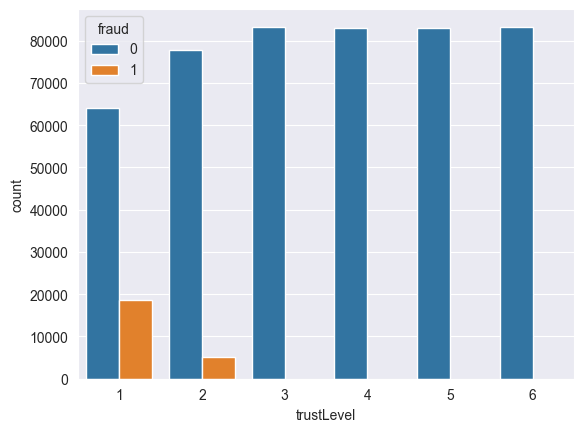

In [11]:
# checking for relationship between 'fraud' and 'trustLevel'
sns.countplot(x='trustLevel', hue='fraud', data=df)
plt.show()


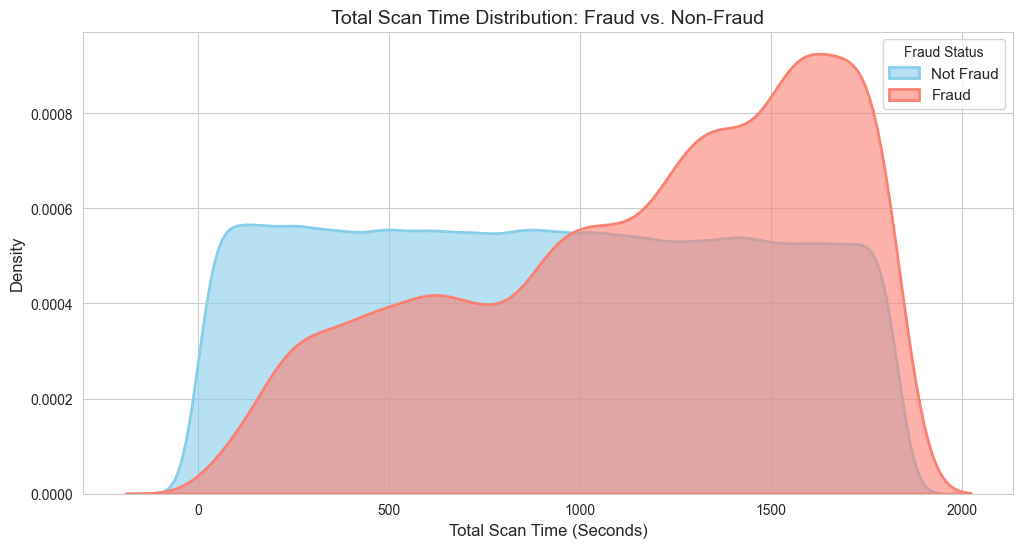

In [12]:
#create a stacked density plot for the 'totalScanTimeInSeconds' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'totalScanTimeInSeconds'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'totalScanTimeInSeconds'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Total Scan Time (Seconds)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Total Scan Time Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)

# Show plot
plt.show()

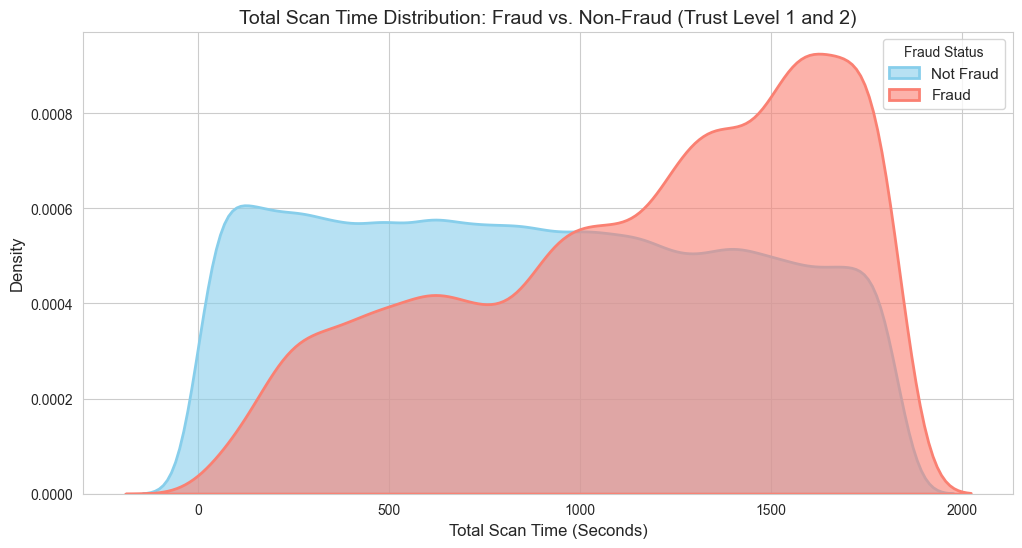

In [13]:
#create the same density plot for 'totalScanTimeInSeconds' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'totalScanTimeInSeconds'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'totalScanTimeInSeconds'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Total Scan Time (Seconds)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Total Scan Time Distribution: Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

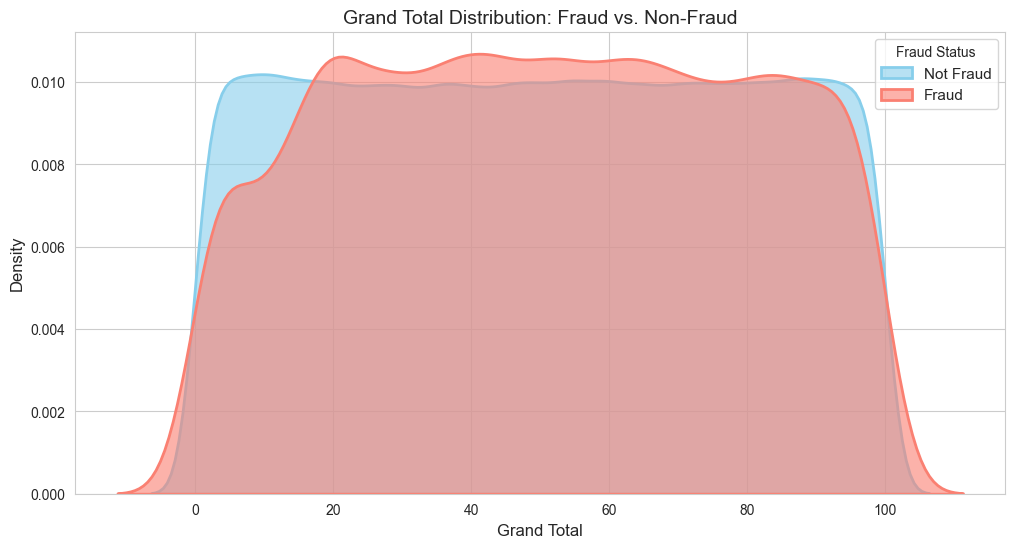

In [14]:
#create a stacked density plot for the 'grandTotal' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'grandTotal'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'grandTotal'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Grand Total', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Grand Total Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)

# Show plot
plt.show()

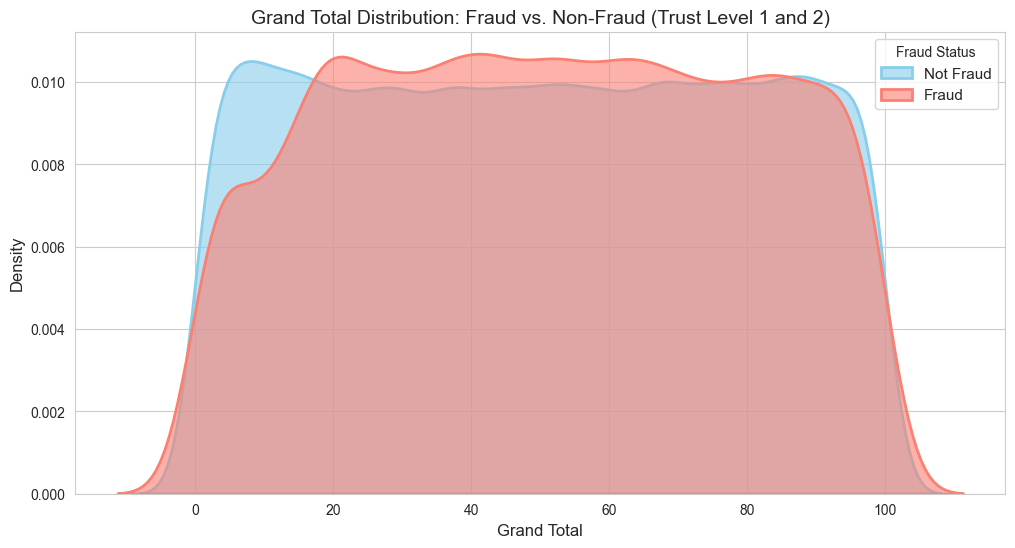

In [15]:
#create the same density plot for 'grandTotal' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'grandTotal'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'grandTotal'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Grand Total', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Grand Total Distribution: Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

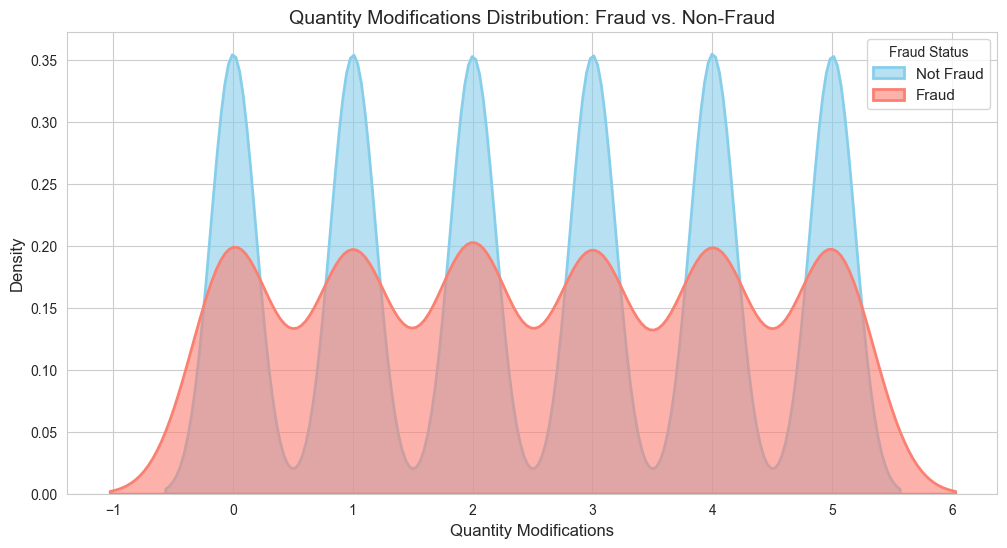

In [16]:
#create a stacked density plot for the 'quantitymodifications' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'quantityModifications'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1.5)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'quantityModifications'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1.5)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Quantity Modifications', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Quantity Modifications Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)

# Show plot
plt.show()

#quantity modification alone is not a good feature to distinguish between fraud and non-fraud

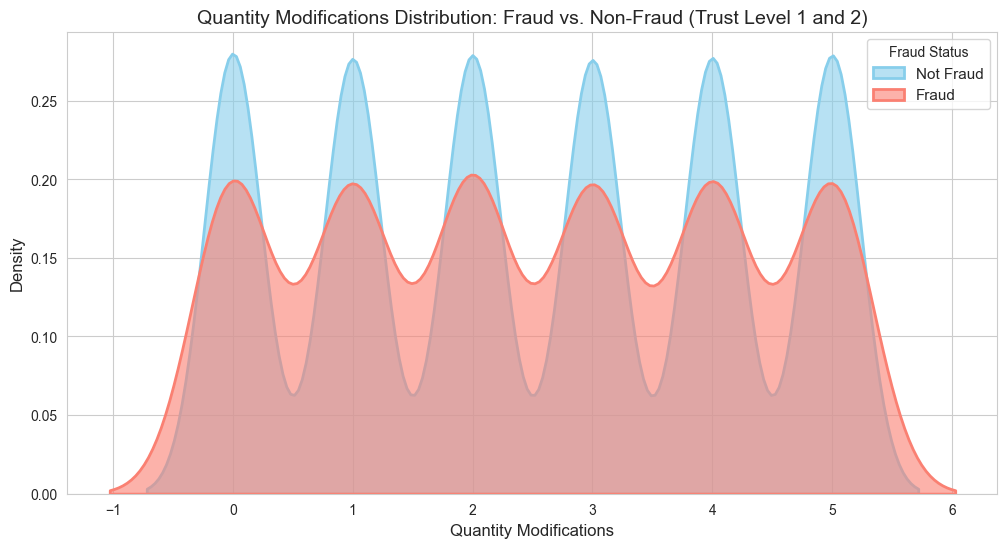

In [17]:
#create the same density plot for 'quantityModifications' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'quantityModifications'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1.5)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'quantityModifications'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1.5)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Quantity Modifications', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Quantity Modifications Distribution: Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

#quantity modification alone is not a good feature to distinguish between fraud and non-fraud

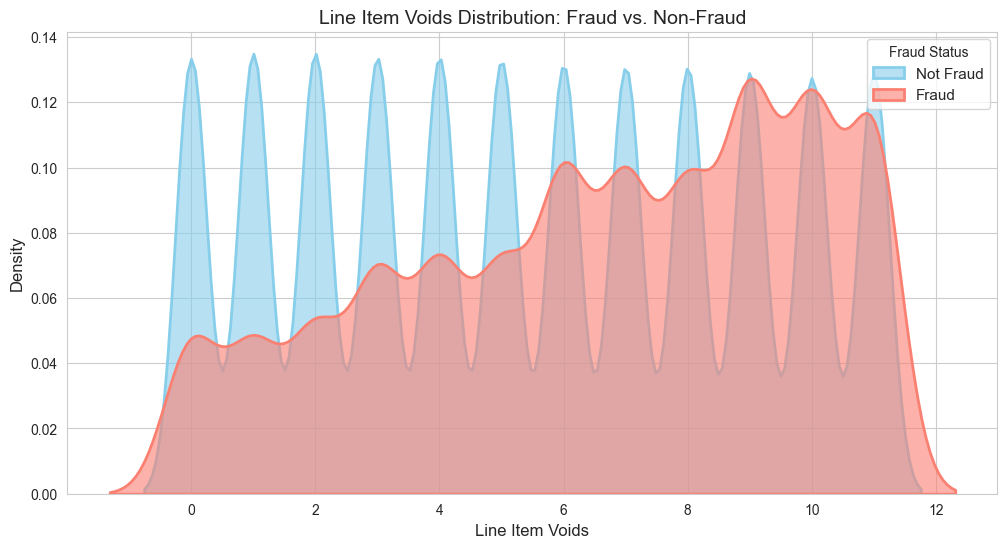

In [18]:
#create the same density plot for 'lineItemVoids' variable across the 'fraud' variable

# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'lineItemVoids'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'lineItemVoids'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Line Item Voids', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Line Item Voids Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)

# Show plot
plt.show()

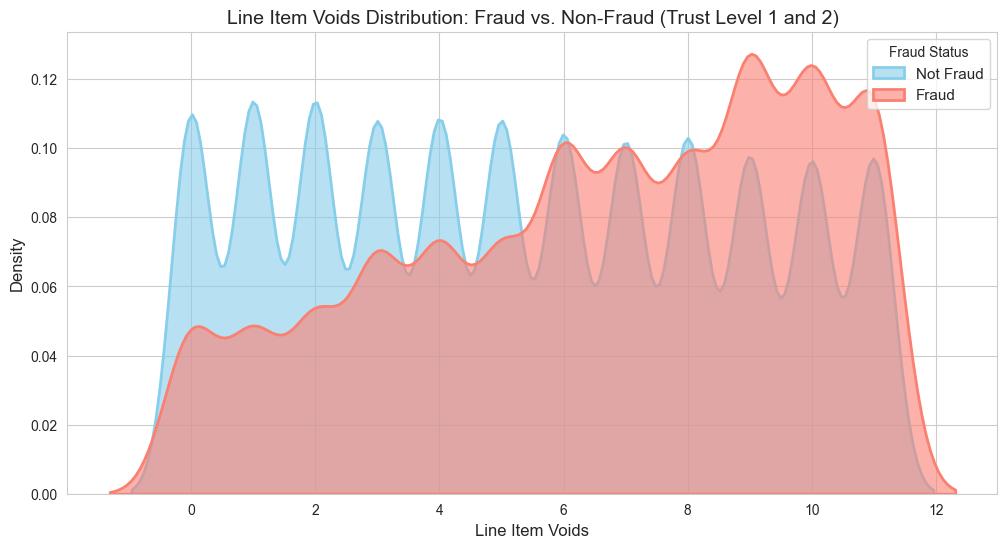

In [19]:
#create the same density plot for 'lineItemVoids' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'lineItemVoids'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'lineItemVoids'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Line Item Voids', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Line Item Voids Distribution: Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

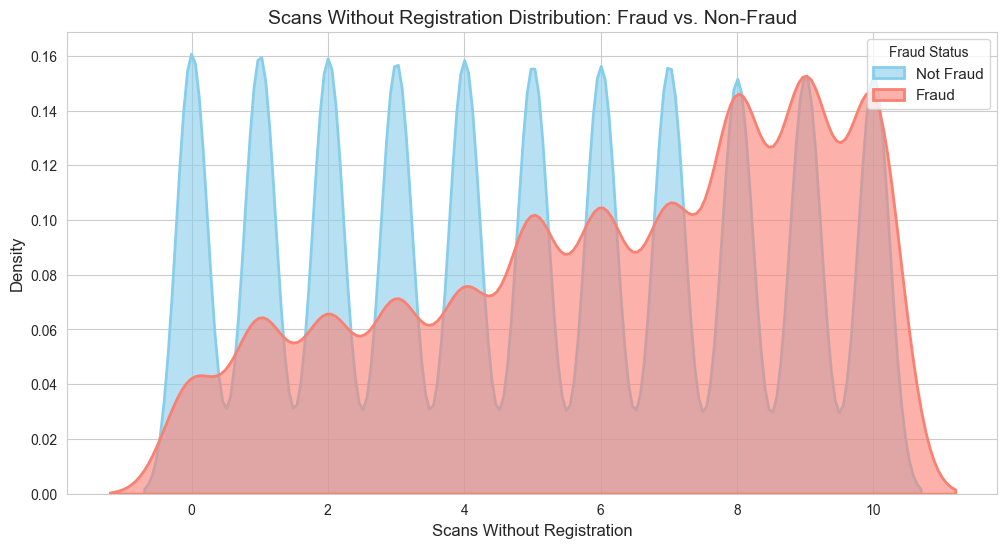

In [20]:
#create a stacked density plot for the 'scansWithoutRegistration' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'scansWithoutRegistration'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'scansWithoutRegistration'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Scans Without Registration', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Scans Without Registration Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)

# Show plot
plt.show()

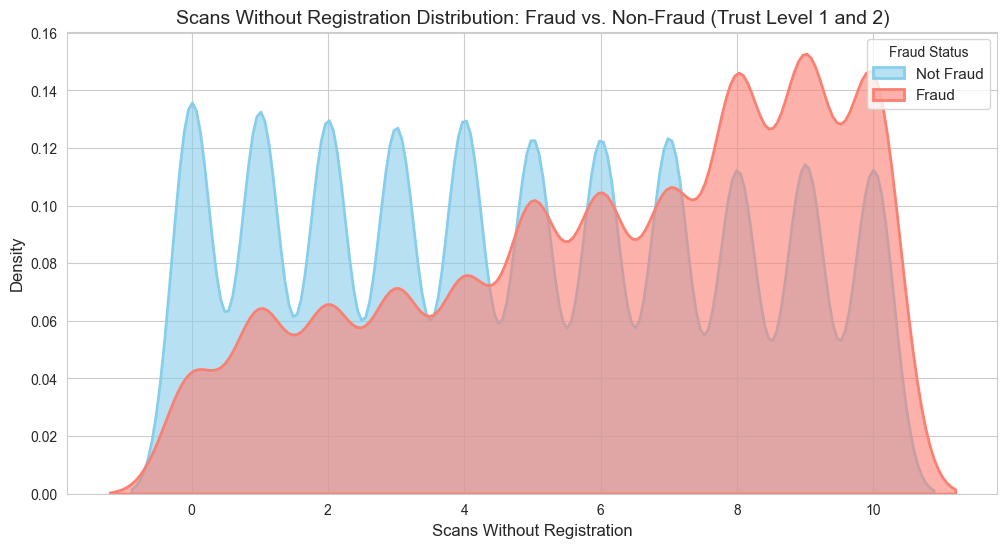

In [21]:
#create the same density plot for 'scansWithoutRegistration' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'scansWithoutRegistration'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'scansWithoutRegistration'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Scans Without Registration', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Scans Without Registration Distribution: Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

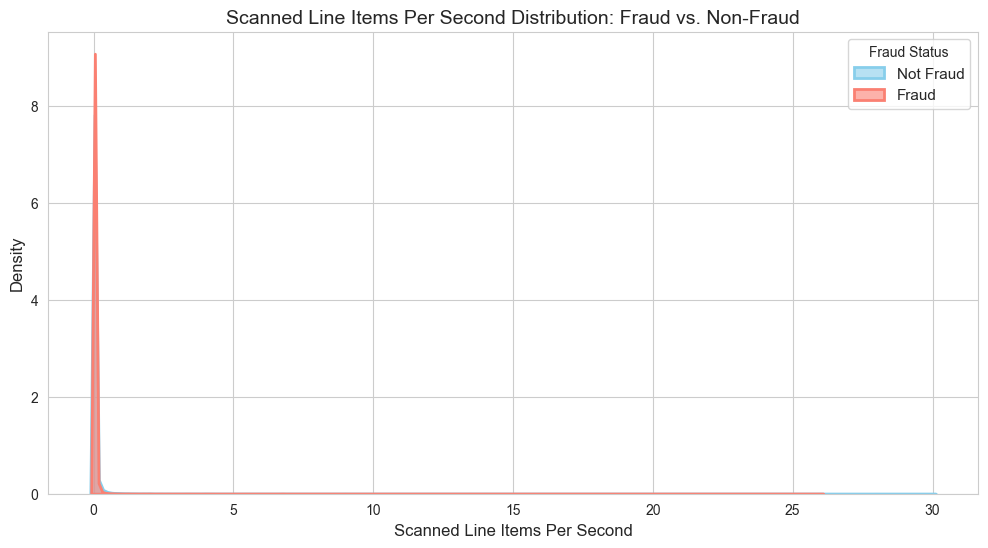

In [23]:
#create a stacked density plot for the 'scannedLineItemsPerSecond' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'scannedLineItemsPerSecond'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'scannedLineItemsPerSecond'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Scanned Line Items Per Second', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Scanned Line Items Per Second Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)

# Show plot
plt.show()
#we have to use log scale for better visualization

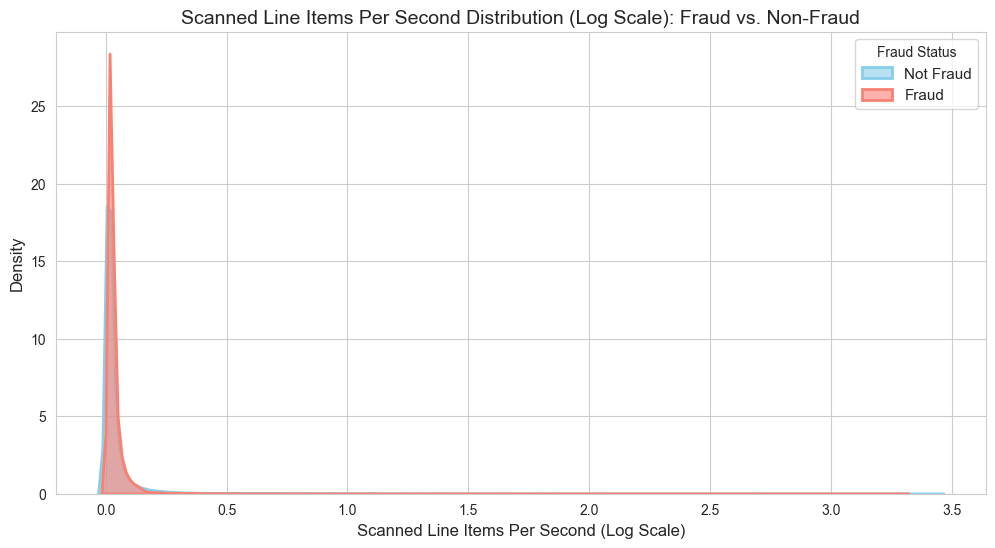

In [13]:
#create a stacked density plot for the 'scannedLineItemsPerSecond' variable with log across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

#applzing log transformation to scannedLineItemsPerSecond
df['log_scannedLineItemsPerSecond'] = np.log1p(df['scannedLineItemsPerSecond'])

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'log_scannedLineItemsPerSecond'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'log_scannedLineItemsPerSecond'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)


# Adding axis labels, title, and customizing the legend
plt.xlabel('Scanned Line Items Per Second (Log Scale)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Scanned Line Items Per Second Distribution (Log Scale): Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

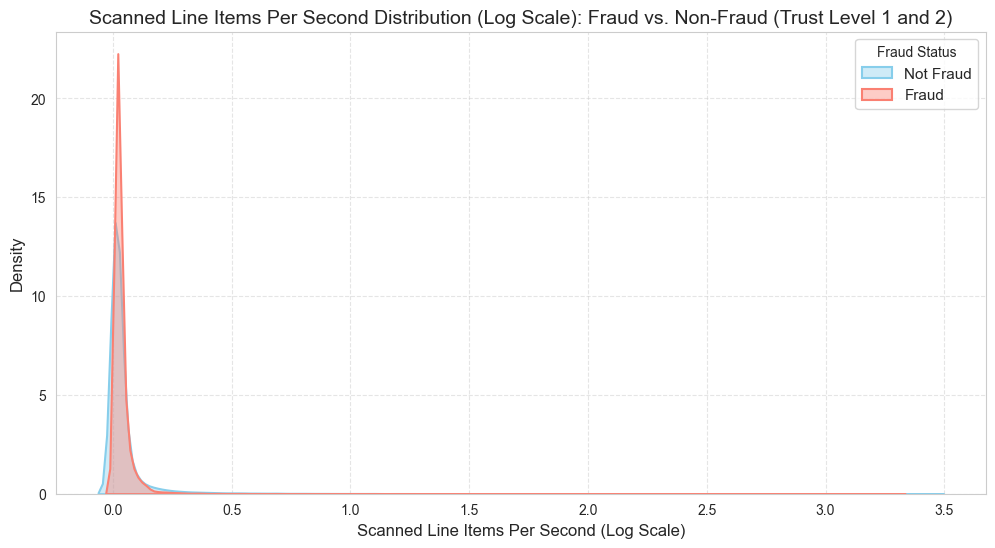

In [14]:
#create the same density plot for 'log_scannedLineItemsPerSecond' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'log_scannedLineItemsPerSecond'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.4,
            lw=1.5,  # Line width for clearer borders
            bw_adjust=1.5)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'log_scannedLineItemsPerSecond'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.4,
            lw=1.5,
            bw_adjust=1.5)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Scanned Line Items Per Second (Log Scale)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Scanned Line Items Per Second Distribution (Log Scale): Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

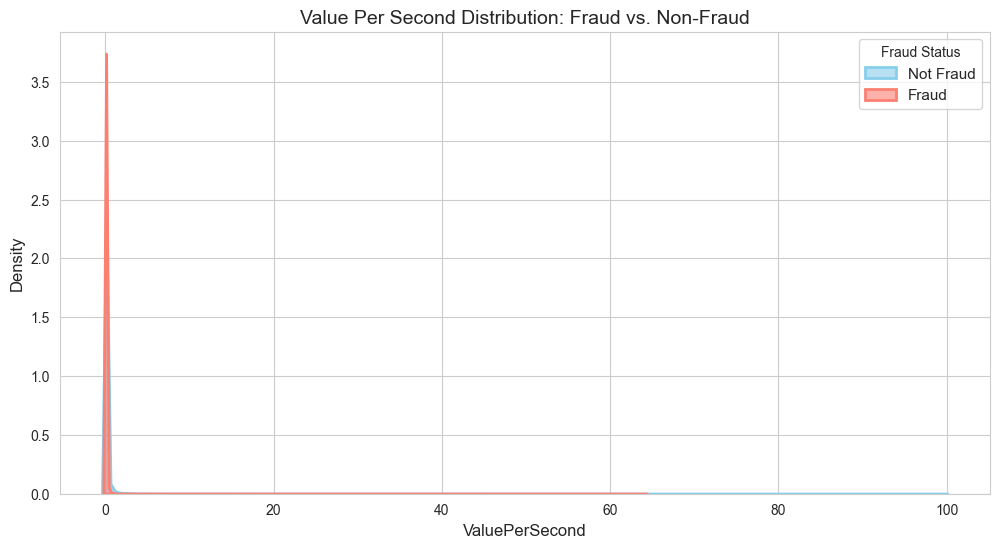

In [26]:
#create a stacked density plot for the 'valuePerSecond' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

#Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'valuePerSecond'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud']==1, 'valuePerSecond'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

plt.xlabel('ValuePerSecond', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Value Per Second Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

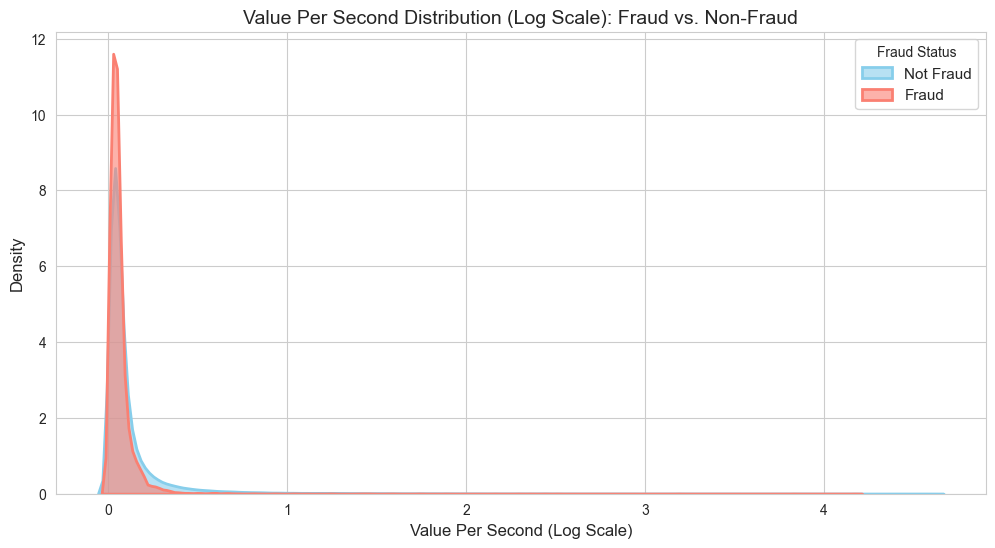

In [15]:
#create a stacked density plot for the 'valuePerSecond' variable with log across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

#applzing log transformation to valuePerSecond
df['log_valuePerSecond'] = np.log1p(df['valuePerSecond'])

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'log_valuePerSecond'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'log_valuePerSecond'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)


# Adding axis labels, title, and customizing the legend
plt.xlabel('Value Per Second (Log Scale)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Value Per Second Distribution (Log Scale): Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

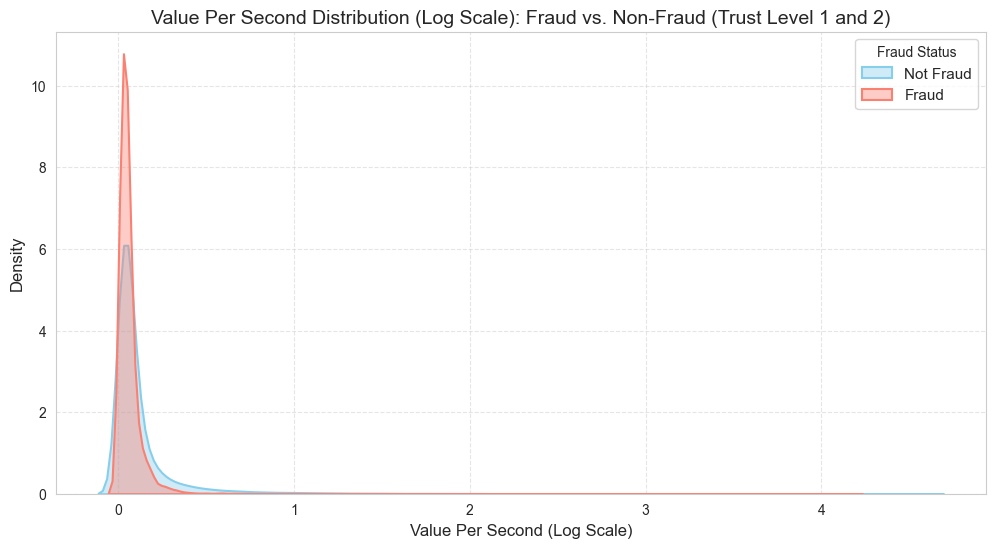

In [16]:
#create the same density plot for 'log_valuePerSecond' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'log_valuePerSecond'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.4,
            lw=1.5,  # Line width for clearer borders
            bw_adjust=1.5)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'log_valuePerSecond'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.4,
            lw=1.5,
            bw_adjust=1.5)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Value Per Second (Log Scale)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Value Per Second Distribution (Log Scale): Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

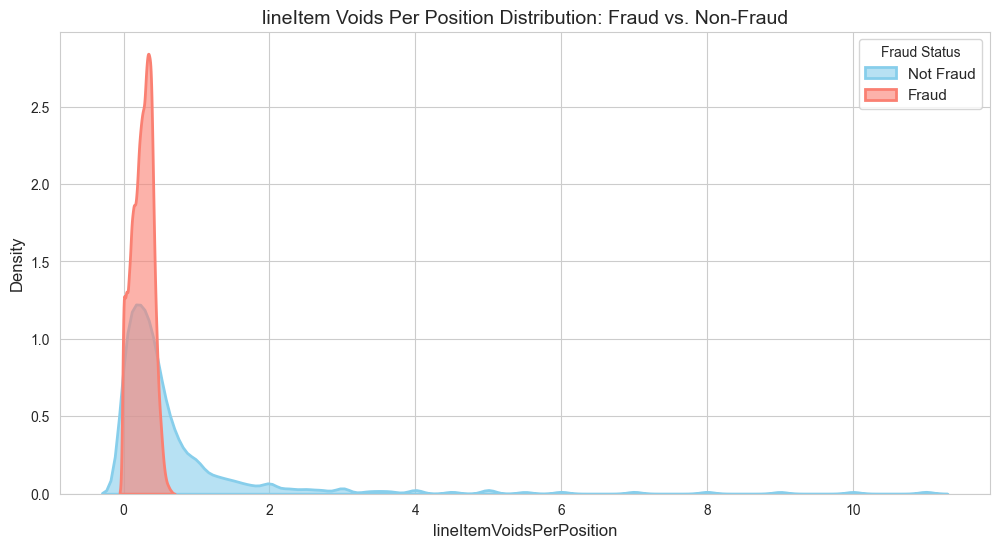

In [17]:
#create a stacked density plot for the 'lineItemVoidsPerPosition' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

#Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'lineItemVoidsPerPosition'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud']==1, 'lineItemVoidsPerPosition'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

plt.xlabel('lineItemVoidsPerPosition', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('lineItem Voids Per Position Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

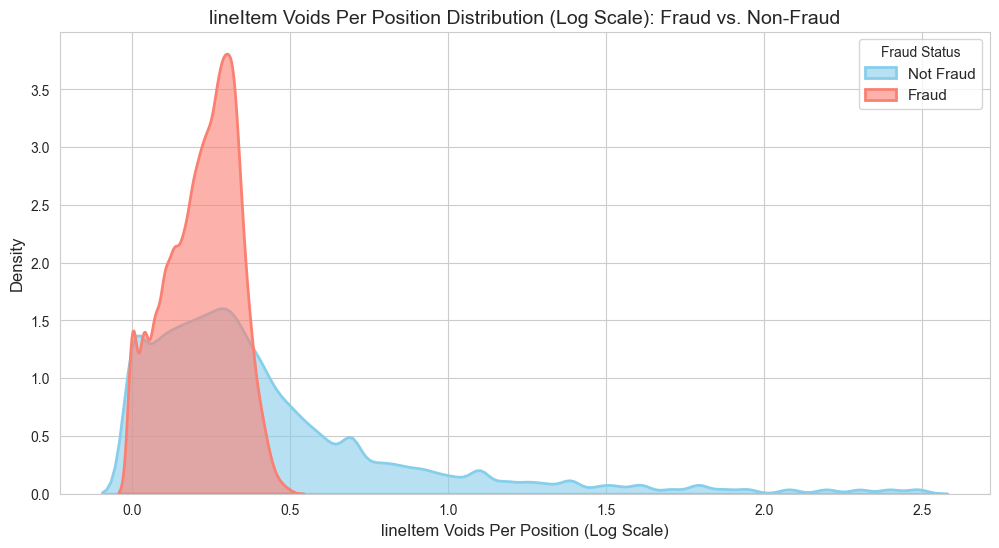

In [18]:
#create a stacked density plot for the 'lineItemVoidsPerPosition' variable with log across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

#applzing log transformation to lineItemVoidsPerPosition
df['log_lineItemVoidsPerPosition'] = np.log1p(df['lineItemVoidsPerPosition'])

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'log_lineItemVoidsPerPosition'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'log_lineItemVoidsPerPosition'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)


# Adding axis labels, title, and customizing the legend
plt.xlabel('lineItem Voids Per Position (Log Scale)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('lineItem Voids Per Position Distribution (Log Scale): Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

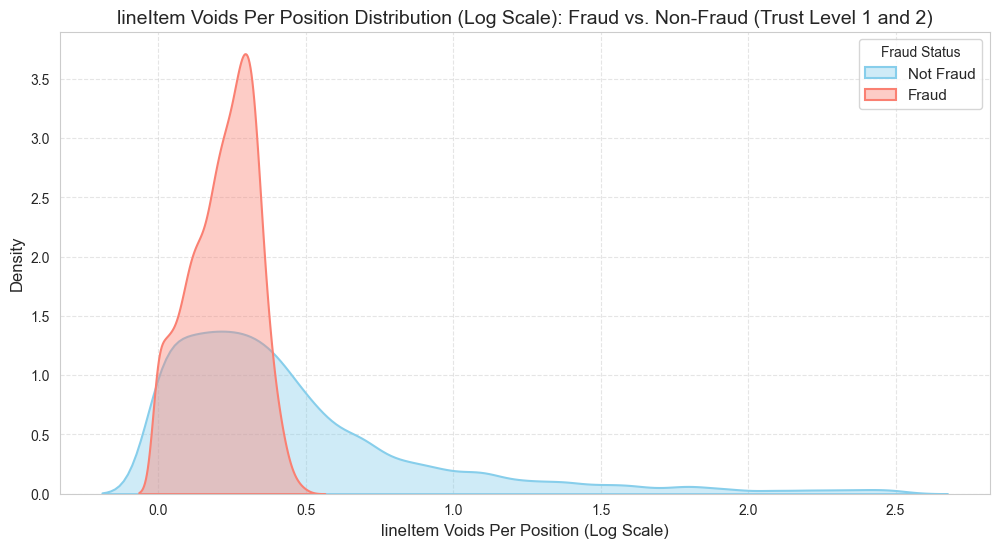

In [30]:
#create the same density plot for 'log_lineItemVoidsPerPosition' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'log_lineItemVoidsPerPosition'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.4,
            lw=1.5,  # Line width for clearer borders
            bw_adjust=1.5)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'log_lineItemVoidsPerPosition'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.4,
            lw=1.5,
            bw_adjust=1.5)

# Adding axis labels, title, and customizing the legend
plt.xlabel('lineItem Voids Per Position (Log Scale)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('lineItem Voids Per Position Distribution (Log Scale): Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

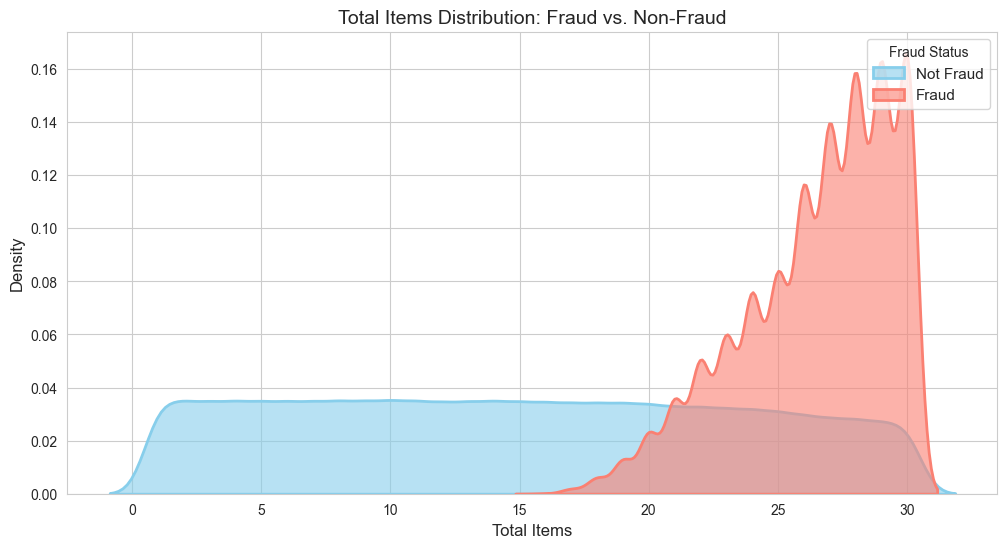

In [19]:
#Create a new variable called 'totalItems'
#The value of the variable should be 'totalScanTimeInSeconds' multiplied by 'scannedLineItemsPerSecond'

#calculate totalItems
df['totalItems'] = df['totalScanTimeInSeconds'] * df['scannedLineItemsPerSecond']

#create a stacked density plot for the 'totalItems' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

#Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'totalItems'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud']==1, 'totalItems'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

plt.xlabel('Total Items', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Total Items Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

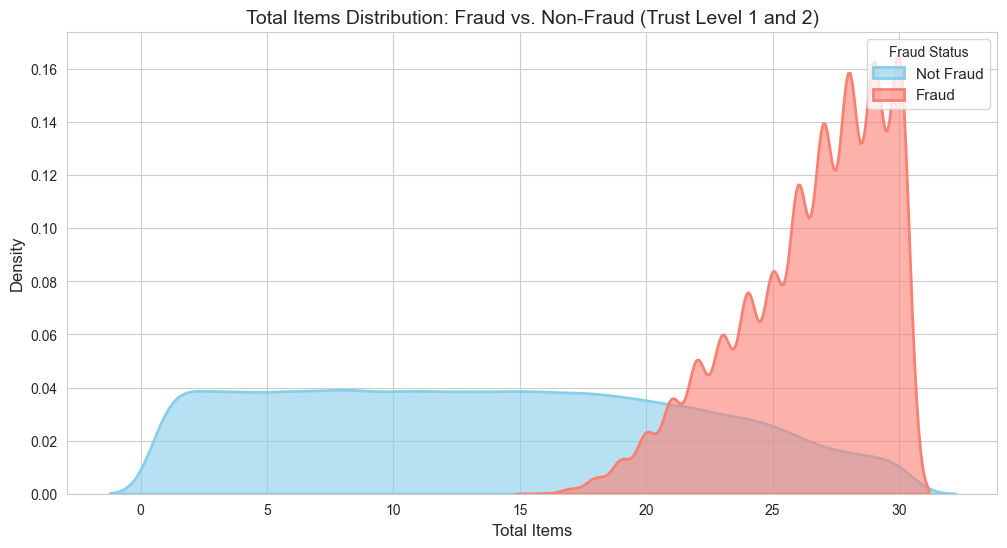

In [20]:
#create the same density plot for 'totalItems' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'totalItems'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'totalItems'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Total Items', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Total Items Distribution: Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

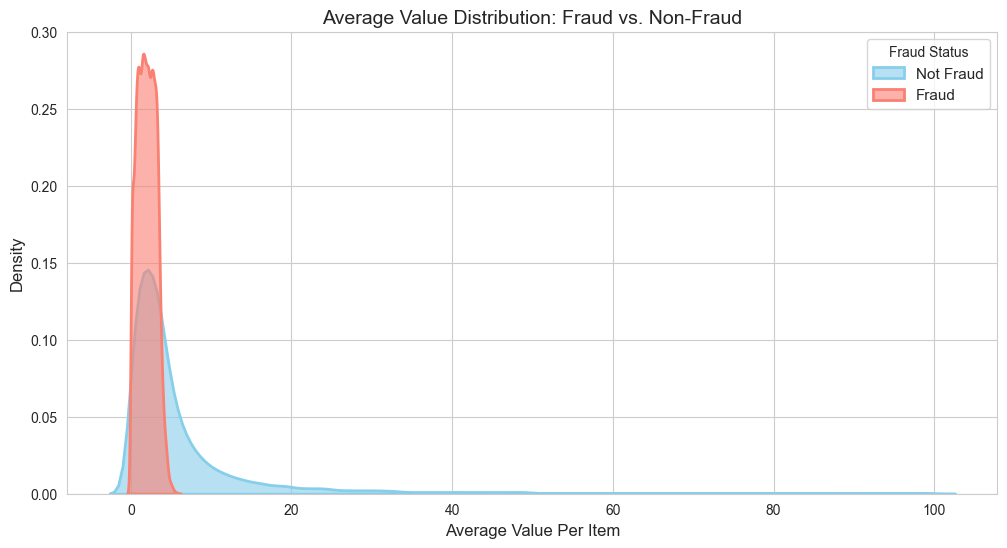

In [21]:
#Create a new variable called 'average value per item'
#set the value to grandtotal / total items
df['AverageValuePerItem'] = df['grandTotal'] / df['totalItems']

#create a stacked density plot for the 'AverageValuePerItem' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

#Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'AverageValuePerItem'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud']==1, 'AverageValuePerItem'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

plt.xlabel('Average Value Per Item', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Average Value Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

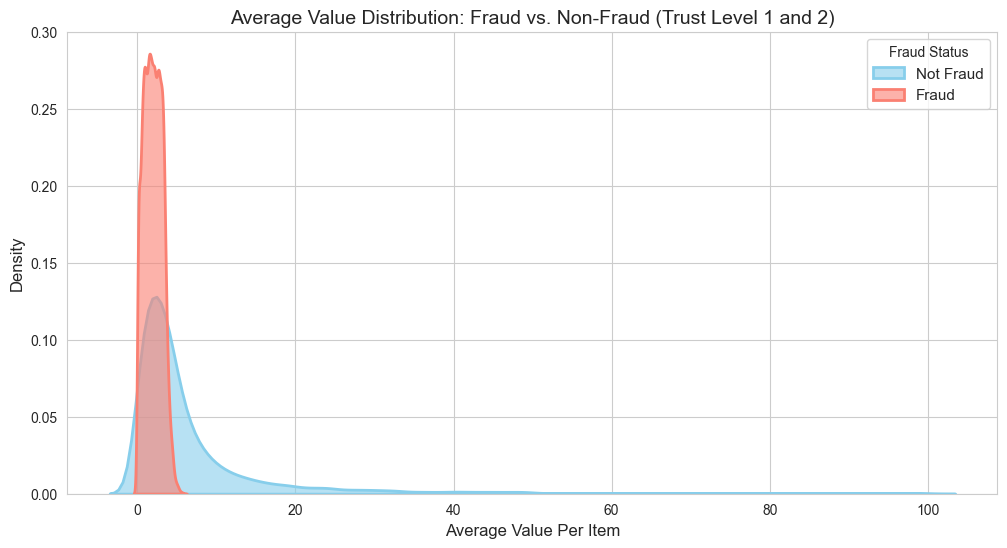

In [22]:
#create the same density plot for 'AverageValuePerItem' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'AverageValuePerItem'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'AverageValuePerItem'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Average Value Per Item', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Average Value Distribution: Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

In [23]:
# checking for the correlation between the variables
df.corr()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,log_scannedLineItemsPerSecond,log_valuePerSecond,log_lineItemVoidsPerPosition,totalItems,AverageValuePerItem
trustLevel,1.000000,0.000065,-0.000718,-0.000436,0.000518,-0.000806,-0.000567,0.000391,0.000469,-0.299178,-0.001081,-0.000836,0.000490,-0.002467,0.000416
totalScanTimeInSeconds,0.000065,1.000000,-0.001570,-0.000619,-0.000886,-0.000602,-0.169937,-0.168923,-0.000038,0.101605,-0.364736,-0.461232,0.000130,-0.000697,0.000395
grandTotal,-0.000718,-0.001570,1.000000,0.000872,0.001876,0.000314,0.000578,0.075609,-0.000773,0.007380,0.001261,0.230922,0.000002,-0.000361,0.330849
lineItemVoids,-0.000436,-0.000619,0.000872,1.000000,0.001962,-0.000974,-0.001085,-0.000131,0.348968,0.069627,-0.000764,-0.000025,0.513348,-0.000170,-0.001650
scansWithoutRegistration,0.000518,-0.000886,0.001876,0.001962,1.000000,0.000079,-0.002141,-0.003911,0.000252,0.080411,-0.003582,-0.003099,0.000655,-0.001928,0.000750
quantityModifications,-0.000806,-0.000602,0.000314,-0.000974,0.000079,1.000000,-0.003039,-0.002115,0.002425,-0.000437,-0.003507,-0.002523,0.002078,-0.003148,0.003158
scannedLineItemsPerSecond,-0.000567,-0.169937,0.000578,-0.001085,-0.002141,-0.003039,1.000000,0.746334,-0.037303,-0.012009,0.832531,0.604569,-0.045660,0.071487,-0.038339
valuePerSecond,0.000391,-0.168923,0.075609,-0.000131,-0.003911,-0.002115,0.746334,1.000000,0.002359,-0.019326,0.689497,0.721993,0.001750,-0.002029,0.026056
lineItemVoidsPerPosition,0.000469,-0.000038,-0.000773,0.348968,0.000252,0.002425,-0.037303,0.002359,1.000000,-0.081520,-0.087883,0.000742,0.926596,-0.514707,0.645366
fraud,-0.299178,0.101605,0.007380,0.069627,0.080411,-0.000437,-0.012009,-0.019326,-0.081520,1.000000,-0.017355,-0.050744,-0.104794,0.283941,-0.090795


# Data Preparation

In [38]:
# let us split the data set for testing
# so the goal is to oversample the minority class in fraud variable
# for this, we have decided to use SMOTE from imblearn
#from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
#from collections import Counter

# Separate #features and target
#X = df.drop('fraud', axis=1)  # replace 'fraud' with your actual target column name
#y = df['fraud']

# Split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE only to training data
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
#print("Before SMOTE:", Counter(y_train))
#print("After SMOTE:", Counter(y_train_resampled))


#decision for commenting out is that after the coaching session
# we have decided not to use synthetic data anymore, as we have enough data within the original dataset

In [39]:
#we have decided to balance the dataset by undersampling the majority class
"""from sklearn.model_selection import train_test_split
from collections import Counter

# We have seen when the trust level is higher than 2, there is no fraud in the dataset
# After discussions in the coaching session, we have decided to drop the data when trust level is higher than 2
# since it can be directly classified as non-fraud
df_filtered = df[df['trustLevel'] <= 2]

# Separate features and target
X = df_filtered.drop('fraud', axis=1)
y = df_filtered['fraud']

print("Filtered dataset size:", len(df_filtered))
print("Filtered class distribution:", Counter(y))

# Step 2: Split into train/test
#   - test_size=0.2 means 20% of filtered data goes to the test set
#   - stratify=y keeps the same class ratio in train and test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Total train_full size:", len(y_train_full))
print("Total test size:", len(y_test))
print("Train_full class distribution (before balancing):", Counter(y_train_full))
print("Test set distribution (real-world imbalance):", Counter(y_test))

# Step 3: Undersample the training set only
# Goal: training set size = 5% of the ENTIRE filtered dataset
# Since we want it balanced, each class gets half of that 5%

total_filtered = len(df_filtered)
train_target_size = int(0.05 * total_filtered)  # e.g., 5% of all filtered rows
samples_per_class = train_target_size // 2

print("Desired training set size:", train_target_size)
print("Samples per class:", samples_per_class)

# Check that there are enough fraud instances in the train_full set
fraud_available = Counter(y_train_full)[1]
if fraud_available < samples_per_class:
    raise ValueError(f"Not enough fraud cases for sampling: required {samples_per_class}, available {fraud_available}")

# Sample indices from the training split
fraud_indices = y_train_full[y_train_full == 1].sample(
    n=samples_per_class,
    random_state=42
).index
nonfraud_indices = y_train_full[y_train_full == 0].sample(
    n=samples_per_class,
    random_state=42
).index

# Combine and create the balanced training set
balanced_idx = fraud_indices.union(nonfraud_indices)
X_train = X_train_full.loc[balanced_idx]
y_train = y_train_full.loc[balanced_idx]

print("Balanced TRAINING set size:", len(y_train))
print("Balanced TRAINING distribution:", Counter(y_train))
print("UNCHANGED test set distribution:", Counter(y_test)) """


# Notes:
#train the set on balanced set
# test it still on unbalanced data
# we tried on balanced test data and model like random forest classifier was performing way better. BUt in reality it is not balanced, hence the goal should be showcase like how it is
# if testing doesnt go well, reduce the imbalance to 1:2 or 1:3 ratio
# or use class weights
# or also try models like BalancedRandomForestClassifier or EasyEnsembleClassifier from imblearn

# our learning is that we are throwing away a lot of useful non-fraud data that could help the model learn more subtle fraud signals, and chosing a model from this would
# not be the best decision
# Hence a CV validation approach on unbalanced data set with class weight would be much better.


'from sklearn.model_selection import train_test_split\nfrom collections import Counter\n\n# We have seen when the trust level is higher than 2, there is no fraud in the dataset\n# After discussions in the coaching session, we have decided to drop the data when trust level is higher than 2\n# since it can be directly classified as non-fraud\ndf_filtered = df[df[\'trustLevel\'] <= 2]\n\n# Separate features and target\nX = df_filtered.drop(\'fraud\', axis=1)\ny = df_filtered[\'fraud\']\n\nprint("Filtered dataset size:", len(df_filtered))\nprint("Filtered class distribution:", Counter(y))\n\n# Step 2: Split into train/test\n#   - test_size=0.2 means 20% of filtered data goes to the test set\n#   - stratify=y keeps the same class ratio in train and test\nX_train_full, X_test, y_train_full, y_test = train_test_split(\n    X,\n    y,\n    test_size=0.2,\n    random_state=42,\n    stratify=y\n)\n\nprint("Total train_full size:", len(y_train_full))\nprint("Total test size:", len(y_test))\nprint

In [40]:
"""from sklearn.model_selection import train_test_split, cross_val_score
from collections import Counter
import pandas as pd

# Step 1: Filter dataset
df_filtered = df[df['trustLevel'] <= 2]
X = df_filtered.drop('fraud', axis=1)
y = df_filtered['fraud']

print("Filtered dataset size:", len(df_filtered))
print("Filtered class distribution:", Counter(y))

# Step 2: Take 20% of the data for model selection (stratified)
X_model_select, _, y_model_select, _ = train_test_split(
    X,
    y,
    test_size=0.8,
    random_state=42,
    stratify=y
)

print("Model selection subset size:", len(y_model_select))
print("Subset class distribution:", Counter(y_model_select))"""

# From modeling, our current model selection set (20%) is not enough to judge generalization, hence we have decided to go for a proper train/test/validate approach

'from sklearn.model_selection import train_test_split, cross_val_score\nfrom collections import Counter\nimport pandas as pd\n\n# Step 1: Filter dataset\ndf_filtered = df[df[\'trustLevel\'] <= 2]\nX = df_filtered.drop(\'fraud\', axis=1)\ny = df_filtered[\'fraud\']\n\nprint("Filtered dataset size:", len(df_filtered))\nprint("Filtered class distribution:", Counter(y))\n\n# Step 2: Take 20% of the data for model selection (stratified)\nX_model_select, _, y_model_select, _ = train_test_split(\n    X,\n    y,\n    test_size=0.8,\n    random_state=42,\n    stratify=y\n)\n\nprint("Model selection subset size:", len(y_model_select))\nprint("Subset class distribution:", Counter(y_model_select))'

# Feature Selection

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

df_filtered = df[df['trustLevel'] <= 2].copy()

# --- 1. Select features and target ---
selected_features = [
    'trustLevel',
    'totalScanTimeInSeconds',
    'grandTotal',
    'lineItemVoids',
    'scansWithoutRegistration',
    'quantityModifications',
    'scannedLineItemsPerSecond',
    'valuePerSecond',
    'lineItemVoidsPerPosition',
    'totalItems',
    'AverageValuePerItem'
]

X = df_filtered[selected_features]
y = df_filtered['fraud']

print("\nInitial dataset shape:", X.shape)
print("Class distribution:\n", y.value_counts(normalize=True))

# --- 2. Remove highly correlated features ---
correlation_matrix = X.corr().abs()
upper = correlation_matrix.where(np.tri(correlation_matrix.shape[0], k=-1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print("\nCorrelated Features Analysis:")
print("Features to drop due to high correlation (>0.95):", to_drop)
X_uncorrelated = X.drop(to_drop, axis=1)
print("Shape after removing correlated features:", X_uncorrelated.shape)

# --- 3. Split data (stratified, to preserve fraud/non-fraud ratio) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_uncorrelated, y, test_size=0.2, stratify=y, random_state=42
)

# --- 4. Scale features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
feature_names = X_uncorrelated.columns

# --- 5. Model training and feature importance with cross-validation ---
def get_importance_with_cv(model, X, y, model_name, cv=5):
    # Get feature importance
    model.fit(X, y)
    if model_name in ['Random Forest', 'XGBoost']:
        importances = model.feature_importances_
    else:
        importances = np.abs(model.coef_[0])

    # Get cross-validation score
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')

    return pd.Series(importances, index=feature_names, name=model_name), cv_scores.mean()

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss',
                                scale_pos_weight=(y_train == 0).sum()/(y_train == 1).sum(), random_state=42),
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    'SVM': SVC(kernel='linear', class_weight='balanced', random_state=42)
}

# Dictionary to store top 10 features for each model
top_features_by_model = {}
cv_scores = {}
all_importances = []

for name, model in models.items():
    imp, cv_score = get_importance_with_cv(model, X_train_scaled, y_train, name)
    # Get top 10 features for this model
    top_features = imp.sort_values(ascending=False).head(10)
    top_features_by_model[name] = top_features
    cv_scores[name] = cv_score
    all_importances.append(imp)

# --- 6. Print top 10 features for each model ---
print("\nTop 10 Features by Model:")
for model_name, features in top_features_by_model.items():
    print(f"\n{model_name}:")
    print(features)


Initial dataset shape: (165626, 11)
Class distribution:
 fraud
0    0.856744
1    0.143256
Name: proportion, dtype: float64

Correlated Features Analysis:
Features to drop due to high correlation (>0.95): []
Shape after removing correlated features: (165626, 11)

Top 10 Features by Model:

Random Forest:
totalItems                   0.431223
AverageValuePerItem          0.102089
lineItemVoidsPerPosition     0.091813
trustLevel                   0.091590
scannedLineItemsPerSecond    0.085546
totalScanTimeInSeconds       0.063295
scansWithoutRegistration     0.062432
lineItemVoids                0.035382
valuePerSecond               0.021579
grandTotal                   0.012446
Name: Random Forest, dtype: float64

XGBoost:
totalItems                   0.476096
trustLevel                   0.151531
lineItemVoids                0.097651
scansWithoutRegistration     0.092082
totalScanTimeInSeconds       0.083474
valuePerSecond               0.042394
grandTotal                   0.020815
s

In [64]:
# --- 7. Get combined set of features from all models' top 10 ---
all_top_features = set()
for features in top_features_by_model.values():
    all_top_features.update(features.index)

# --- 8. Calculate combined importance scores for these features ---
importance_df = pd.concat(all_importances, axis=1)
importance_df['Mean Importance'] = importance_df.mean(axis=1)
importance_df['Std Importance'] = importance_df.std(axis=1)
importance_df['Model Count'] = (importance_df.iloc[:, :4] > 0).sum(axis=1)

# Filter for features that were in any model's top 10
combined_scores = importance_df.loc[list(all_top_features)].sort_values('Mean Importance', ascending=False)

print("\nCombined Scores for Top Features:")
print(combined_scores)


Combined Scores for Top Features:
                           Random Forest   XGBoost  Logistic Regression  \
totalItems                      0.431223  0.476096            12.187945   
lineItemVoidsPerPosition        0.091813  0.014038             7.968998   
trustLevel                      0.091590  0.151531             4.565881   
AverageValuePerItem             0.102089  0.003712             4.577541   
lineItemVoids                   0.035382  0.097651             3.518452   
totalScanTimeInSeconds          0.063295  0.083474             3.426965   
scansWithoutRegistration        0.062432  0.092082             3.045181   
grandTotal                      0.012446  0.020815             0.651328   
scannedLineItemsPerSecond       0.085546  0.015839             0.330041   
valuePerSecond                  0.021579  0.042394             0.067064   

                                SVM  Mean Importance  Std Importance  \
totalItems                 7.380645         5.118977        4.96530

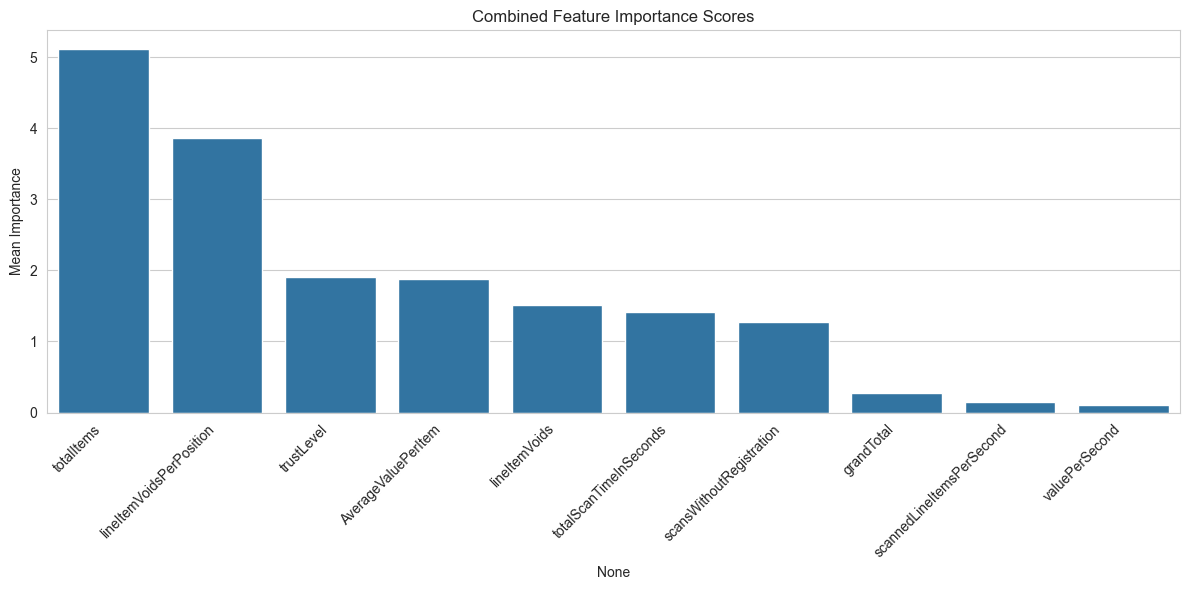

In [65]:
# --- 9. Visualization ---
# Plot combined importance scores
plt.figure(figsize=(12, 6))
sns.barplot(x=combined_scores.index, y='Mean Importance', data=combined_scores)
plt.xticks(rotation=45, ha='right')
plt.title('Combined Feature Importance Scores')
plt.tight_layout()
plt.show()

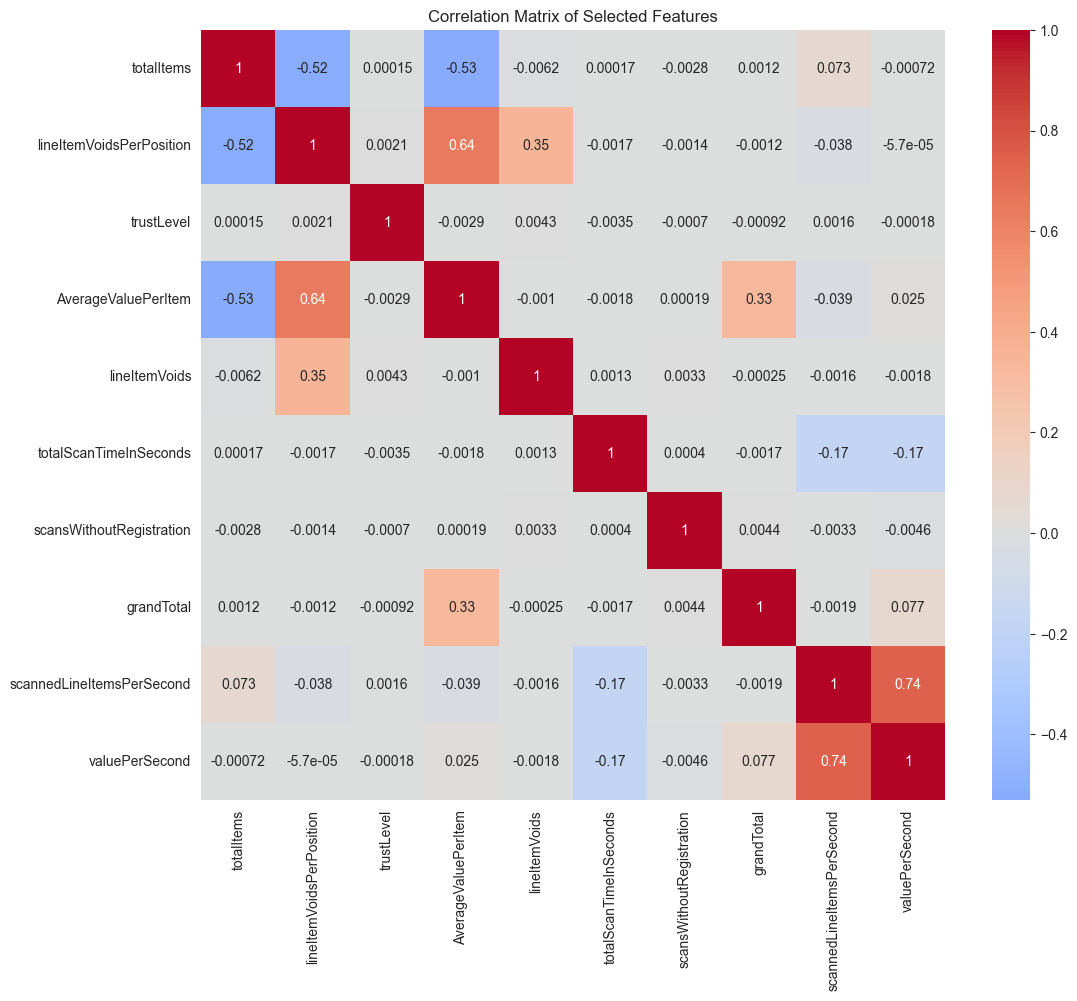

In [67]:
# --- 10. Correlation Analysis of Selected Features ---
selected_corr = X_uncorrelated[combined_scores.index].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(selected_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [68]:
# --- 11. Print Summary Statistics ---
print("\nSummary Statistics:")
print(f"Total features analyzed: {len(X_uncorrelated.columns)}")
print(f"Features selected: {len(combined_scores)}")
print("\nCross-validation F1 scores:")
for model, score in cv_scores.items():
    print(f"{model}: {score:.4f}")


Summary Statistics:
Total features analyzed: 11
Features selected: 10

Cross-validation F1 scores:
Random Forest: 0.9754
XGBoost: 0.9850
Logistic Regression: 0.8888
SVM: 0.8858


# Modeling

In [45]:
"""from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Define pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Optional, depending on features
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# 5-Fold Stratified Cross Validation on balanced data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate with AUC scoring
scores = cross_val_score(pipeline,  X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# Results
print("Cross-validated AUC scores:", scores)
print("Mean AUC:", scores.mean())"""

#Notes: avoid scalar

'from sklearn.model_selection import StratifiedKFold, cross_val_score\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.ensemble import RandomForestClassifier\n\n# Define pipeline\npipeline = Pipeline(steps=[\n    (\'scaler\', StandardScaler()),  # Optional, depending on features\n    (\'rf\', RandomForestClassifier(n_estimators=100, random_state=42))\n])\n\n# 5-Fold Stratified Cross Validation on balanced data\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\n\n# Evaluate with AUC scoring\nscores = cross_val_score(pipeline,  X_train, y_train, scoring=\'roc_auc\', cv=cv, n_jobs=-1)\n\n# Results\nprint("Cross-validated AUC scores:", scores)\nprint("Mean AUC:", scores.mean())'

In [48]:
"""from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train a decision tree on the real, balanced training data
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Predict on the balanced test set
y_pred_test = dtree.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred_test, target_names=["Not Fraud", "Fraud"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Test Set)")
plt.show() """

'from sklearn.tree import DecisionTreeClassifier\nfrom sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay\nimport matplotlib.pyplot as plt\n\n# Train a decision tree on the real, balanced training data\ndtree = DecisionTreeClassifier(max_depth=3, random_state=42)\ndtree.fit(X_train, y_train)\n\n# Predict on the balanced test set\ny_pred_test = dtree.predict(X_test)\n\n# Classification report\nprint(classification_report(y_test, y_pred_test, target_names=["Not Fraud", "Fraud"]))\n\n# Confusion matrix\ncm = confusion_matrix(y_test, y_pred_test)\ndisp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])\ndisp.plot(cmap=\'Blues\')\nplt.title("Decision Tree Confusion Matrix (Test Set)")\nplt.show() '

In [49]:
import numpy as np
import pandas as pd

#from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
#from xgboost import XGBClassifier
#from sklearn.metrics import roc_auc_score, average_precision_score, make_scorer

#from imblearn.pipeline import Pipeline as ImbPipeline
#from imblearn.under_sampling import NearMiss

# 0) Apply your trustLevel filter once up-front
#df_filtered = df[df.trustLevel <= 2].copy()
#X = df_filtered.drop(columns=['fraud'])
#y = df_filtered['fraud']

# 1) Split off 20% for development, 80% held out as final test
#dev_idx = df_filtered.sample(frac=0.20, random_state=42).index
#X_dev, y_dev = X.loc[dev_idx], y.loc[dev_idx]
#X_test, y_test = X.drop(dev_idx), y.drop(dev_idx)

#print("Dev set size:", len(y_dev), "  Test set size:", len(y_test))
#print("Dev fraud rate:", y_dev.mean(), "  Test fraud rate:", y_test.mean())

# 2) Build an imblearn Pipeline: NearMiss → classifier placeholder
#pipeline = ImbPipeline([
 #   ('undersample', NearMiss(version=1, n_neighbors=3)),
  #  ('clf', RandomForestClassifier(random_state=42))
#])

# 3) Grid of algorithms + hyperparameters
"""
param_grid = [
    # Random Forest
    {
      'clf': [RandomForestClassifier(random_state=42, n_jobs=-1)],
      'clf__n_estimators': [100, 200],
      'clf__max_depth': [None, 10, 20],
      'clf__class_weight': ['balanced']
    },
    # Logistic Regression
    {
      'clf': [LogisticRegression(max_iter=1000, solver='saga')],
      'clf__C': [0.01, 0.1, 1],
      'clf__class_weight': ['balanced']
    },
    # Support Vector Machine (linear)
    {
      'clf': [SVC(kernel='linear', probability=True)],
      'clf__C': [0.1, 1, 10],
      'clf__class_weight': ['balanced']
    },
    # XGBoost
    {
      'clf': [XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1)],
      'clf__n_estimators': [100, 200],
      'clf__max_depth': [3, 6],
      # scale_pos_weight = ratio of non-fraud to fraud in dev set
      'clf__scale_pos_weight': [ (y_dev==0).sum() / (y_dev==1).sum() ]
    }
]

# 4) Set up Stratified CV & average-precision scoring
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
ap_scorer = make_scorer(average_precision_score, needs_proba=True)

search = GridSearchCV(
    pipeline,
    param_grid,
    scoring=ap_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# 5) Run model selection on the 20%
search.fit(X_dev, y_dev)

print("Best params:", search.best_params_)
print("Best CV AP:", search.best_score_)"""

'\nparam_grid = [\n    # Random Forest\n    {\n      \'clf\': [RandomForestClassifier(random_state=42, n_jobs=-1)],\n      \'clf__n_estimators\': [100, 200],\n      \'clf__max_depth\': [None, 10, 20],\n      \'clf__class_weight\': [\'balanced\']\n    },\n    # Logistic Regression\n    {\n      \'clf\': [LogisticRegression(max_iter=1000, solver=\'saga\')],\n      \'clf__C\': [0.01, 0.1, 1],\n      \'clf__class_weight\': [\'balanced\']\n    },\n    # Support Vector Machine (linear)\n    {\n      \'clf\': [SVC(kernel=\'linear\', probability=True)],\n      \'clf__C\': [0.1, 1, 10],\n      \'clf__class_weight\': [\'balanced\']\n    },\n    # XGBoost\n    {\n      \'clf\': [XGBClassifier(use_label_encoder=False, eval_metric=\'logloss\', n_jobs=-1)],\n      \'clf__n_estimators\': [100, 200],\n      \'clf__max_depth\': [3, 6],\n      # scale_pos_weight = ratio of non-fraud to fraud in dev set\n      \'clf__scale_pos_weight\': [ (y_dev==0).sum() / (y_dev==1).sum() ]\n    }\n]\n\n# 4) Set up Str

In [50]:
#why we need scaling?
# Because certain ML algorithms are senstive to the scale of input features - meaning they behave differently depending on the range or units of the variable.
# so models like logistics regression or SVM requires us to use an standard scaler
# cause these models use distances or dot products in their calculation

#example: If one feature (e.g., totalScanTimeInSeconds, max = 1831) has a much larger scale than another (e.g., valuePerSecond, max ≈ 100), the model will give too much weight to the larger-scaled feature — even if it’s not more important.


In [51]:
"""from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, precision_score, recall_score
from xgboost import XGBClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from collections import Counter
import pandas as pd
import numpy as np

# Step 3: Define metrics
scoring = {
    'roc_auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Define models and grids
models_and_grids = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [5, 10],
            'min_samples_split': [2, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(scale_pos_weight=(y_model_select == 0).sum() / (y_model_select == 1).sum(),
                               use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 4],
            'learning_rate': [0.1, 0.01]
        }
    },
    'LogisticRegression': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
        ]),
        'params': {
            'clf__C': [0.01, 0.1, 1, 10]
        }
    },
    'SVM': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', SVC(class_weight='balanced', probability=True, random_state=42))
        ]),
        'params': {
            'clf__C': [0.1, 1, 10],
            'clf__kernel': ['linear', 'rbf']
        }
    },
    'EasyEnsemble': {
        'model': EasyEnsembleClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 20],
            'sampling_strategy': ['auto']
        }
    }
}

# Step 5: Evaluate all models
results = {}

for name, config in models_and_grids.items():
    print(f"\nTraining and tuning {name}...")
    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring=scoring,
        refit='roc_auc',  # Best model by AUC
        cv=cv,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_model_select, y_model_select)
    results[name] = grid
    print(f"Best params for {name}: {grid.best_params_}")
    print("Best scores:")
    for metric in scoring:
        score = grid.cv_results_[f'mean_test_{metric}'][grid.best_index_]
        print(f"  {metric}: {score:.4f}")

# Step 6: Get the best model overall
best_model_name = max(results, key=lambda k: results[k].best_score_)
final_model = results[best_model_name].best_estimator_

print(f"\nBest overall model: {best_model_name} with ROC AUC: {results[best_model_name].best_score_:.4f}") """

'from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.svm import SVC\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.metrics import make_scorer, f1_score, roc_auc_score, precision_score, recall_score\nfrom xgboost import XGBClassifier\nfrom imblearn.ensemble import EasyEnsembleClassifier\nfrom collections import Counter\nimport pandas as pd\nimport numpy as np\n\n# Step 3: Define metrics\nscoring = {\n    \'roc_auc\': \'roc_auc\',\n    \'f1\': \'f1\',\n    \'precision\': \'precision\',\n    \'recall\': \'recall\'\n}\n\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\n\n# Step 4: Define models and grids\nmodels_and_grids = {\n    \'RandomForest\': {\n        \'model\': RandomForestClassifier(class_weight=\'balanced\', random_state=42),\n        \'params\': {\n         

In [54]:
#important
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from xgboost import XGBClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

# Step 1: Filter dataset
df_filtered = df[df['trustLevel'] <= 2]
X = df_filtered.drop('fraud', axis=1)
y = df_filtered['fraud']

print("Filtered dataset size:", len(df_filtered))
print("Filtered class distribution:", Counter(y))

# Step 2: Proper train/val/test split (60% train, 20% val, 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)  # 0.25 x 0.8 = 0.2

print("Training set size:", len(y_train))
print("Validation set size:", len(y_val))
print("Test set size:", len(y_test))
print("Training class distribution:", Counter(y_train))
print("Validation class distribution:", Counter(y_val))
print("Test class distribution:", Counter(y_test))

# Step 3: Define metrics
scoring = {
    'roc_auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Define models and grids
models_and_grids = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [100],
            'max_depth': [3, 5, 7],
            'min_samples_split': [5, 10],
            'min_samples_leaf': [10, 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(
            scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42
        ),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [2, 3],
            'learning_rate': [0.01, 0.05],
            'subsample': [0.7],
            'colsample_bytree': [0.7],
            'min_child_weight': [5],
            'gamma': [1]
        }
    },
    'LogisticRegression': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
        ]),
        'params': {
            'clf__C': [0.001, 0.01, 0.1, 1],
            'clf__penalty': ['l1', 'l2'],
            'clf__solver': ['saga']
        }
    },
    'SVM': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', SVC(class_weight='balanced', probability=True, random_state=42))
        ]),
        'params': {
            'clf__C': [0.01, 0.1, 1],
            'clf__kernel': ['linear', 'rbf']
        }
    },
    'EasyEnsemble': {
        'model': EasyEnsembleClassifier(estimator=DecisionTreeClassifier(),random_state=42),
        'params': {
            'n_estimators': [10, 20],
            'estimator__max_depth': [3]
        }
    }
}

# Step 5: Train models
results = {}

for name, config in models_and_grids.items():
    print(f"\nTraining and tuning {name}...")

    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring=scoring,
        refit='roc_auc',
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    fit_params = config.get('fit_params', {})
    grid.fit(X_train, y_train, **fit_params)
    results[name] = grid

    print(f"Best params for {name}: {grid.best_params_}")
    print("Cross-validation best scores:")
    for metric in scoring:
        score = grid.cv_results_[f'mean_test_{metric}'][grid.best_index_]
        print(f"  {metric}: {score:.4f}")

    y_val_pred = grid.predict(X_val)
    y_val_proba = grid.predict_proba(X_val)[:, 1]

    val_auc = roc_auc_score(y_val, y_val_proba)
    val_f1 = f1_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)

    print(f"Validation scores for {name}:")
    print(f"  ROC AUC: {val_auc:.4f}")
    print(f"  F1: {val_f1:.4f}")
    print(f"  Precision: {val_precision:.4f}")
    print(f"  Recall: {val_recall:.4f}")

# Step 6: Select best model
best_model_name = None
best_val_auc = 0
final_model = None

for name, grid in results.items():
    y_val_proba = grid.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, y_val_proba)
    if val_auc > best_val_auc:
        best_val_auc = val_auc
        best_model_name = name
        final_model = grid.best_estimator_

print(f"\nBest model on validation set: {best_model_name} with ROC AUC: {best_val_auc:.4f}")

# Step 7: Evaluate on test set
y_test_proba = final_model.predict_proba(X_test)[:, 1]
y_test_pred = final_model.predict(X_test)

test_auc = roc_auc_score(y_test, y_test_proba)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

print(f"\nTest set evaluation of the final model ({best_model_name}):")
print(f"  ROC AUC: {test_auc:.4f}")
print(f"  F1: {test_f1:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall: {test_recall:.4f}")

Filtered dataset size: 165626
Filtered class distribution: Counter({0: 141899, 1: 23727})
Training set size: 99375
Validation set size: 33125
Test set size: 33126
Training class distribution: Counter({0: 85139, 1: 14236})
Validation class distribution: Counter({0: 28380, 1: 4745})
Test class distribution: Counter({0: 28380, 1: 4746})

Training and tuning RandomForest...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params for RandomForest: {'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 5, 'n_estimators': 100}
Cross-validation best scores:
  roc_auc: 0.9853
  f1: 0.6950
  precision: 0.5367
  recall: 0.9860
Validation scores for RandomForest:
  ROC AUC: 0.9867
  F1: 0.7001
  Precision: 0.5425
  Recall: 0.9869

Training and tuning XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jibin\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\jibin\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:15:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params for XGBoost: {'colsample_bytree': 0.7, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.7}
Cross-validation best scores:
  roc_auc: 0.9960
  f1: 0.8091
  precision: 0.6814
  recall: 0.9956
Validation scores for XGBoost:
  ROC AUC: 0.9961
  F1: 0.8096
  Precision: 0.6814
  Recall: 0.9973

Training and tuning LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params for LogisticRegression: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Cross-validation best scores:
  roc_auc: 0.9964
  f1: 0.8863
  precision: 0.8049
  recall: 0.9860
Validation scores for LogisticRegression:
  ROC AUC: 0.9960
  F1: 0.8806
  Precision: 0.7984
  Recall: 0.9817

Training and tuning SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best params for SVM: {'clf__C': 1, 'clf__kernel': 'rbf'}
Cross-validation best scores:
  roc_auc: 0.9974
  f1: 0.9003
  precision: 0.8249
  rec

Filtered dataset size: 165626
Filtered class distribution: Counter({0: 141899, 1: 23727})
Training set size: 99375
Validation set size: 33125
Test set size: 33126
Training class distribution: Counter({0: 85139, 1: 14236})
Validation class distribution: Counter({0: 28380, 1: 4745})
Test class distribution: Counter({0: 28380, 1: 4746})

Training and tuning RandomForest...


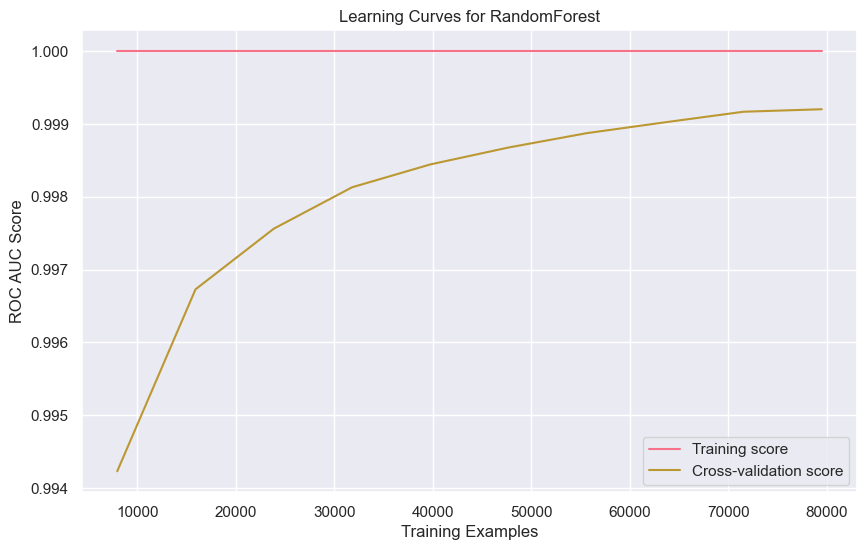

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params for RandomForest: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 200}
Cross-validation best scores:
  roc_auc: 0.9922
  f1: 0.7788
  precision: 0.6411
  recall: 0.9917
  average_precision: 0.9575
Validation scores for RandomForest:
  ROC AUC: 0.9928
  F1: 0.7891
  Precision: 0.6548
  Recall: 0.9928


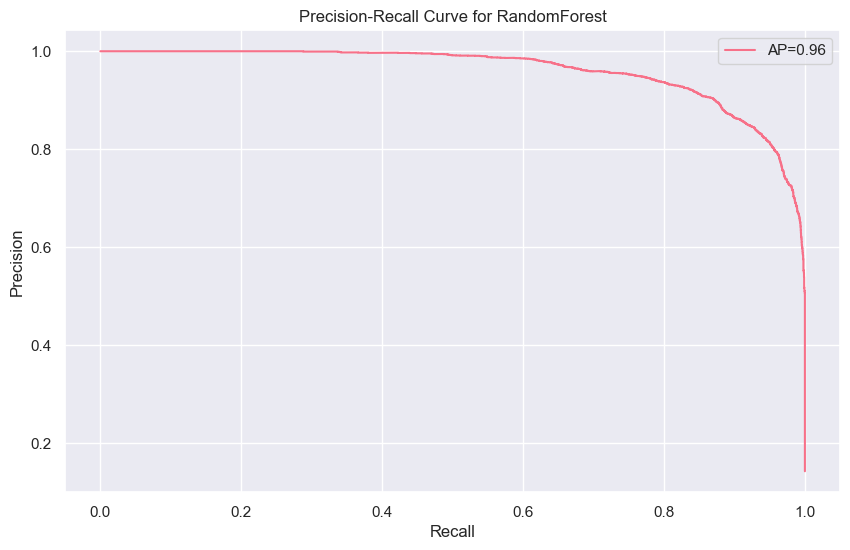


Training and tuning XGBoost...


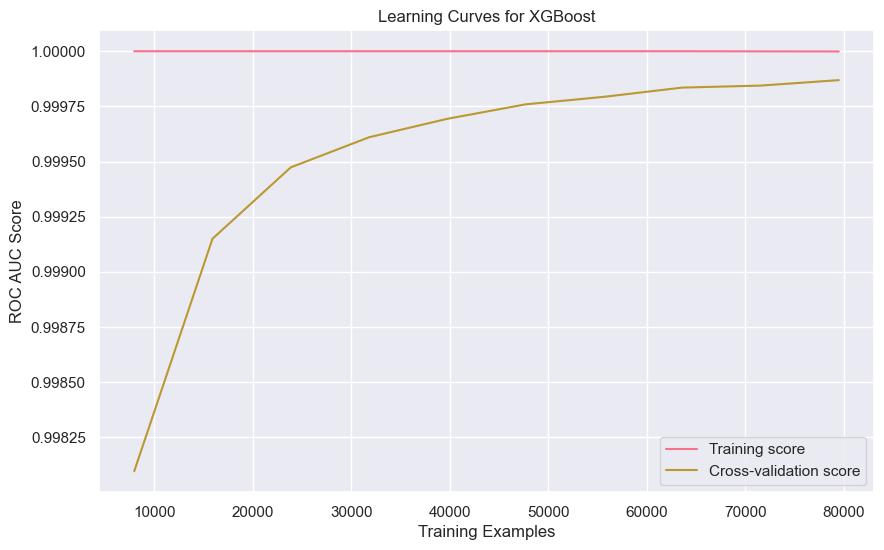

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best params for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.8}
Cross-validation best scores:
  roc_auc: 0.9997
  f1: 0.9248
  precision: 0.8607
  recall: 0.9993
  average_precision: 0.9981
Validation scores for XGBoost:
  ROC AUC: 0.9998
  F1: 0.9172
  Precision: 0.8470
  Recall: 1.0000


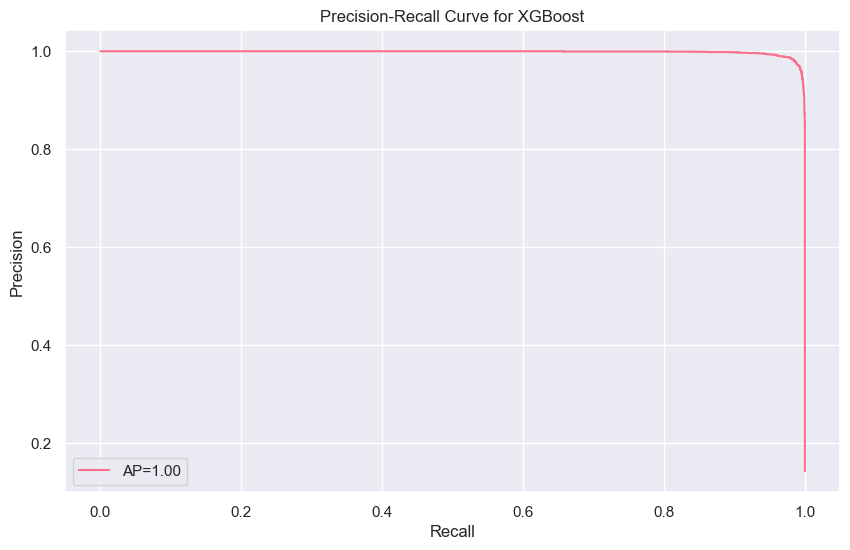


Training and tuning LogisticRegression...


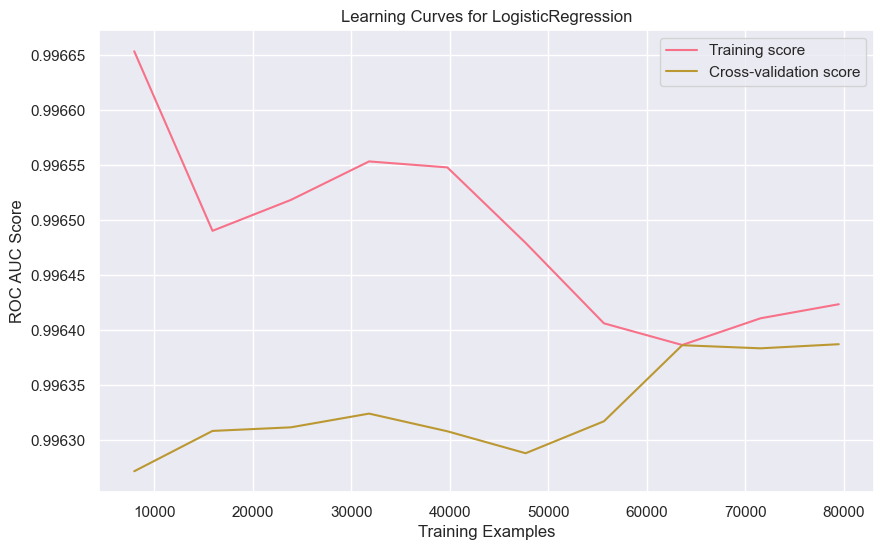

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best params for LogisticRegression: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Cross-validation best scores:
  roc_auc: 0.9964
  f1: 0.8864
  precision: 0.8051
  recall: 0.9859
  average_precision: 0.9788
Validation scores for LogisticRegression:
  ROC AUC: 0.9960
  F1: 0.8809
  Precision: 0.7990
  Recall: 0.9817


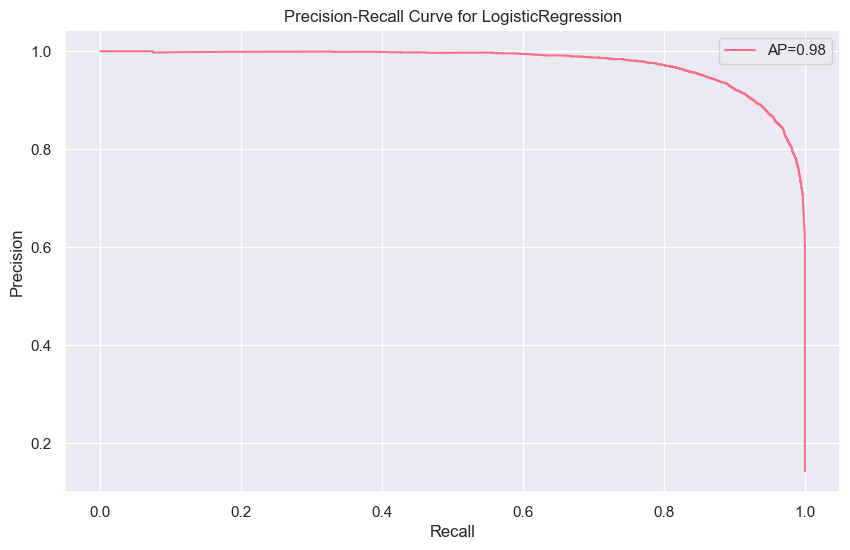


Training and tuning SVM...


In [ ]:
#version 2 that makes sure that we prevent overfitting

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, precision_recall_curve, average_precision_score, classification_report, confusion_matrix, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Step 1: Filter dataset and drop 'valuePerSecond'
df_filtered = df[df['trustLevel'] <= 2]
X = df_filtered.drop(['fraud', 'valuePerSecond'], axis=1)  # Drop both columns here
y = df_filtered['fraud']

print("Filtered dataset size:", len(df_filtered))
print("Filtered class distribution:", Counter(y))

# Step 2: Proper train/val/test split (60% train, 20% val, 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)  # 0.25 x 0.8 = 0.2

print("Training set size:", len(y_train))
print("Validation set size:", len(y_val))
print("Test set size:", len(y_test))
print("Training class distribution:", Counter(y_train))
print("Validation class distribution:", Counter(y_val))
print("Test class distribution:", Counter(y_test))

# Set plot style
sns.set_theme(style="darkgrid", palette="husl")

# Define scoring metrics
scoring = {
    'roc_auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'average_precision': 'average_precision'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models with anti-overfitting measures
models_and_grids = {
    'RandomForest': {
        'model': RandomForestClassifier(
            class_weight='balanced',
            random_state=42,
            oob_score=True
        ),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'min_samples_split': [5, 10],
            'min_samples_leaf': [4, 8],
            'max_features': ['sqrt', 'log2']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(
            scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42
        ),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5],
            'learning_rate': [0.01, 0.05],
            'subsample': [0.8],
            'colsample_bytree': [0.8],
            'min_child_weight': [3, 5],
            'gamma': [0.1]
        }
    },
    'LogisticRegression': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
        ]),
        'params': {
            'clf__C': [0.01, 0.1, 1],
            'clf__penalty': ['l1', 'l2'],
            'clf__solver': ['saga']
        }
    },
    'SVM': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', SVC(class_weight='balanced', probability=True, random_state=42))
        ]),
        'params': {
            'clf__C': [0.01, 0.1, 1],
            'clf__kernel': ['linear', 'rbf'],
            'clf__gamma': ['scale', 'auto', 0.1],
            'clf__tol': [1e-3, 1e-4]
        }
    }
}

# Train models with overfitting prevention
results = {}

for name, config in models_and_grids.items():
    print(f"\nTraining and tuning {name}...")

    # Plot learning curves
    train_sizes, train_scores, val_scores = learning_curve(
        config['model'], X_train, y_train,
        cv=cv, scoring='roc_auc',
        train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
    plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Cross-validation score')
    plt.title(f'Learning Curves for {name}')
    plt.xlabel('Training Examples')
    plt.ylabel('ROC AUC Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Grid search
    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring=scoring,
        refit='roc_auc',
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    fit_params = config.get('fit_params', {})
    if name == 'XGBoost':
         fit_params = {}  # REMOVE early_stopping_rounds and eval_set for grid search

    grid.fit(X_train, y_train, **fit_params)
    results[name] = grid

    print(f"Best params for {name}: {grid.best_params_}")
    print("Cross-validation best scores:")
    for metric in scoring:
        score = grid.cv_results_[f'mean_test_{metric}'][grid.best_index_]
        print(f"  {metric}: {score:.4f}")

    # Evaluate on validation set
    y_val_pred = grid.predict(X_val)
    y_val_proba = grid.predict_proba(X_val)[:, 1]

    val_auc = roc_auc_score(y_val, y_val_proba)
    val_f1 = f1_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)

    print(f"Validation scores for {name}:")
    print(f"  ROC AUC: {val_auc:.4f}")
    print(f"  F1: {val_f1:.4f}")
    print(f"  Precision: {val_precision:.4f}")
    print(f"  Recall: {val_recall:.4f}")

    # Plot precision-recall curve
    precision, recall, _ = precision_recall_curve(y_val, y_val_proba)
    average_precision = average_precision_score(y_val, y_val_proba)

    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, label=f'AP={average_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Refit best XGBoost with early stopping ---
if 'XGBoost' in results:
    print("\nRefitting best XGBoost with early stopping on validation set...")
    best_xgb_grid = results['XGBoost']
    best_xgb = best_xgb_grid.best_estimator_

    # Fit on combined train+val for best use of data, but here we'll use X_train and early stopping on X_val
    best_xgb.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        early_stopping_rounds=20,
        verbose=False
    )
    results['XGBoost_refit'] = best_xgb


# Create ensemble of top models
top_models = []
for name, grid in results.items():
    y_val_proba = grid.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, y_val_proba)
    if val_auc > 0.8:  # Only include models with good performance
        top_models.append((name, grid.best_estimator_))

if len(top_models) > 1:
    ensemble = VotingClassifier(
        estimators=[(name, model) for name, model in top_models],
        voting='soft',
        weights=[1] * len(top_models)
    )
    ensemble.fit(X_train, y_train)
    final_model = ensemble
else:
    best_model_name = None
    best_val_auc = 0
    final_model = None

    for name, grid in results.items():
        y_val_proba = grid.predict_proba(X_val)[:, 1]
        val_auc = roc_auc_score(y_val, y_val_proba)
        if val_auc > best_val_auc:
            best_val_auc = val_auc
            best_model_name = name
            final_model = grid.best_estimator_

# Final evaluation
y_test_proba = final_model.predict_proba(X_test)[:, 1]
y_test_pred = final_model.predict(X_test)

# Calculate metrics
test_auc = roc_auc_score(y_test, y_test_proba)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

print(f"\nFinal Model Test Set Evaluation:")
print(f"  ROC AUC: {test_auc:.4f}")
print(f"  F1: {test_f1:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall: {test_recall:.4f}")

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, precision_recall_curve, average_precision_score, classification_report, confusion_matrix, roc_curve
from sklearn.pipeline import Pipeline
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

# ------- Data Preparation -------
# Step 1: Filter dataset and drop 'valuePerSecond'
df_filtered = df[df['trustLevel'] <= 2]
X = df_filtered.drop(['fraud', 'valuePerSecond'], axis=1)
y = df_filtered['fraud']

print("Filtered dataset size:", len(df_filtered))
print("Filtered class distribution:", Counter(y))

# Step 2: Train/val/test split (60/20/20 stratified)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)  # 0.25 x 0.8 = 0.2

print("Training set size:", len(y_train))
print("Validation set size:", len(y_val))
print("Test set size:", len(y_test))

# ------- Plot Style --------
sns.set_theme(style="darkgrid")

# ------- Model and Grid Setup --------
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # Use 3-fold to speed up
scoring = 'roc_auc'  # Simplify scoring for GridSearchCV

models_and_grids = {
    'RandomForest': {
        'model': RandomForestClassifier(
            class_weight='balanced', random_state=42, oob_score=True
        ),
        'params': {
            'n_estimators': [100],  # reduce for speed
            'max_depth': [5, 7],
            'min_samples_split': [5, 10],
            'min_samples_leaf': [4, 8],
            'max_features': ['sqrt']
        }
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(
            scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42
        ),
        'params': {
            'n_estimators': [100],
            'max_depth': [3, 5],
            'learning_rate': [0.05],
            'subsample': [0.8],
            'colsample_bytree': [0.8],
            'min_child_weight': [3],
            'gamma': [0.1]
        }
    },
    'LogisticRegression': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(class_weight='balanced', max_iter=500, random_state=42))
        ]),
        'params': {
            'clf__C': [0.1, 1],
            'clf__penalty': ['l2'],
            'clf__solver': ['saga']
        }
    },
    'SVM': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', SVC(class_weight='balanced', probability=True, random_state=42))
        ]),
        'params': {
            'clf__C': [0.1, 1],
            'clf__kernel': ['rbf'],
            'clf__gamma': ['scale']
        }
    }
}

# ------- Training, Tuning, Validation -------
results = {}
for name, config in models_and_grids.items():
    print(f"\nTraining and tuning {name}...")
    # Optional: Plot learning curve for the first run, comment out to speed up
    # train_sizes, train_scores, val_scores = learning_curve(
    #     config['model'], X_train, y_train,
    #     cv=cv, scoring='roc_auc',
    #     train_sizes=np.linspace(0.3, 1.0, 4)  # fewer points for speed
    # )
    # plt.figure(figsize=(8, 5))
    # plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
    # plt.plot(train_sizes, np.mean(val_scores, axis=1), label='CV')
    # plt.title(f'Learning Curve - {name}')
    # plt.legend(); plt.show()

    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring=scoring,
        refit=True,
        cv=cv,
        n_jobs=-1,
        verbose=0
    )
    grid.fit(X_train, y_train)
    results[name] = grid

    print(f"  Best params: {grid.best_params_}")
    print(f"  Best val ROC AUC: {grid.best_score_:.4f}")

    # Evaluate on validation set
    y_val_pred = grid.predict(X_val)
    y_val_proba = grid.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, y_val_proba)
    val_f1 = f1_score(y_val, y_val_pred)
    print(f"  Validation ROC AUC: {val_auc:.4f} | F1: {val_f1:.4f}")

# ------- Choose Best Model -------
best_model_name = None
best_val_auc = -1
final_model = None

for name, grid in results.items():
    y_val_proba = grid.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, y_val_proba)
    if val_auc > best_val_auc:
        best_val_auc = val_auc
        best_model_name = name
        final_model = grid.best_estimator_

print(f"\nSelected Best Model: {best_model_name}")

# If XGBoost, optionally refit with early stopping
if best_model_name == "XGBoost":
    print("Refitting best XGBoost with early stopping on validation set...")
    final_model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        early_stopping_rounds=10,
        verbose=False
    )

# ------- Final Evaluation on Test Set -------
y_test_proba = final_model.predict_proba(X_test)[:, 1]
y_test_pred = final_model.predict(X_test)

print("\nFinal Model Test Set Evaluation:")
print(f"  ROC AUC: {roc_auc_score(y_test, y_test_proba):.4f}")
print(f"  F1: {f1_score(y_test, y_test_pred):.4f}")
print(f"  Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"  Recall: {recall_score(y_test, y_test_pred):.4f}")

# Detailed Classification Report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_test_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

Filtered dataset size: 165626
Filtered class distribution: Counter({0: 141899, 1: 23727})
Training set size: 99375
Validation set size: 33125
Test set size: 33126

Training and tuning RandomForest...
  Best params: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
  Best val ROC AUC: 0.9921
  Validation ROC AUC: 0.9923 | F1: 0.7826

Training and tuning XGBoost...
  Best params: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
  Best val ROC AUC: 0.9986
  Validation ROC AUC: 0.9988 | F1: 0.8716

Training and tuning LogisticRegression...
  Best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
  Best val ROC AUC: 0.9963
  Validation ROC AUC: 0.9960 | F1: 0.8809

Training and tuning SVM...
  Best params: {'clf__C': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
  Best val ROC AUC: 0.9974
  Validation ROC AUC: 0.9972 | F1

TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
#trustLevel + totalItems + lineItemVoids + scansWithoutRegistration+ totalScanTimeInSeconds + grandTotal + grandTotal valuePerSecond

In [40]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from xgboost import XGBClassifier
from collections import Counter
import pandas as pd
import numpy as np

# Step 1: Filter dataset
df_filtered = df[df['trustLevel'] <= 2]
X = df_filtered.drop('fraud', axis=1)
y = df_filtered['fraud']

print("Filtered dataset size:", len(df_filtered))
print("Filtered class distribution:", Counter(y))

# Step 2: Proper train/val/test split (60% train, 20% val, 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)  # 0.25 x 0.8 = 0.2

print("Training set size:", len(y_train))
print("Validation set size:", len(y_val))
print("Test set size:", len(y_test))
print("Training class distribution:", Counter(y_train))
print("Validation class distribution:", Counter(y_val))
print("Test class distribution:", Counter(y_test))

# Step 3: Define metrics
scoring = {
    'roc_auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Define models and grids
models_and_grids = {
    'RandomForest': {
        'model': RandomForestClassifier(
            class_weight='balanced',
            random_state=42,
            oob_score=True,
            bootstrap=True,
            max_samples=0.6,  # Use only 60% of samples for each tree
            max_features='sqrt'
        ),
        'params': {
            'n_estimators': [50],  # Reduce number of trees
            'max_depth': [3, 4],   # Reduce max depth
            'min_samples_split': [20, 30],  # Increase minimum samples for split
            'min_samples_leaf': [20, 30],   # Increase minimum samples per leaf
            'ccp_alpha': [0.02, 0.05]  # Increase pruning
        }
    },
    'XGBoost': {
        'model': XGBClassifier(
            scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42,
            subsample=0.6,        # Reduce subsample
            colsample_bytree=0.6  # Reduce column sample
        ),
        'params': {
            'n_estimators': [50],
            'max_depth': [2, 3],
            'learning_rate': [0.01],  # Reduce learning rate
            'min_child_weight': [10, 15],  # Increase min_child_weight
            'gamma': [2, 3],  # Increase gamma for stronger pruning
            'reg_alpha': [0.5, 1.0],  # Increase L1 regularization
            'reg_lambda': [0.5, 1.0]  # Increase L2 regularization
        }
    },
    'LogisticRegression': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(
                class_weight='balanced',
                max_iter=1000,
                random_state=42,
                solver='saga'
            ))
        ]),
        'params': {
            'clf__C': [0.001, 0.0001],  # Reduce C for stronger regularization
            'clf__penalty': ['l1', 'l2'],
            'clf__l1_ratio': [0.5]
        }
    },
    'SVM': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', SVC(
                class_weight='balanced',
                probability=True,
                random_state=42,
                cache_size=1000
            ))
        ]),
        'params': {
            'clf__C': [0.001, 0.0001],  # Reduce C for stronger regularization
            'clf__kernel': ['linear'],  # Use only linear kernel
            'clf__tol': [1e-3]
        }
    }
}

# Step 5: Train models
results = {}

for name, config in models_and_grids.items():
    print(f"\nTraining and tuning {name}...")

    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring=scoring,
        refit='roc_auc',
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    fit_params = config.get('fit_params', {})
    grid.fit(X_train, y_train, **fit_params)
    results[name] = grid

    print(f"Best params for {name}: {grid.best_params_}")
    print("Cross-validation best scores:")
    for metric in scoring:
        score = grid.cv_results_[f'mean_test_{metric}'][grid.best_index_]
        print(f"  {metric}: {score:.4f}")

    y_val_pred = grid.predict(X_val)
    y_val_proba = grid.predict_proba(X_val)[:, 1]

    val_auc = roc_auc_score(y_val, y_val_proba)
    val_f1 = f1_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)

    print(f"Validation scores for {name}:")
    print(f"  ROC AUC: {val_auc:.4f}")
    print(f"  F1: {val_f1:.4f}")
    print(f"  Precision: {val_precision:.4f}")
    print(f"  Recall: {val_recall:.4f}")

# Step 6: Select best model
best_model_name = None
best_val_auc = 0
final_model = None

for name, grid in results.items():
    y_val_proba = grid.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, y_val_proba)
    if val_auc > best_val_auc:
        best_val_auc = val_auc
        best_model_name = name
        final_model = grid.best_estimator_

print(f"\nBest model on validation set: {best_model_name} with ROC AUC: {best_val_auc:.4f}")

# Step 7: Evaluate on test set
y_test_proba = final_model.predict_proba(X_test)[:, 1]
y_test_pred = final_model.predict(X_test)

test_auc = roc_auc_score(y_test, y_test_proba)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

print(f"\nTest set evaluation of the final model ({best_model_name}):")
print(f"  ROC AUC: {test_auc:.4f}")
print(f"  F1: {test_f1:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall: {test_recall:.4f}")

Filtered dataset size: 165626
Filtered class distribution: Counter({0: 141899, 1: 23727})
Training set size: 99375
Validation set size: 33125
Test set size: 33126
Training class distribution: Counter({0: 85139, 1: 14236})
Validation class distribution: Counter({0: 28380, 1: 4745})
Test class distribution: Counter({0: 28380, 1: 4746})

Training and tuning RandomForest...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best params for RandomForest: {'ccp_alpha': 0.02, 'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 20, 'n_estimators': 50}
Cross-validation best scores:
  roc_auc: 0.9615
  f1: 0.5896
  precision: 0.4261
  recall: 0.9572
Validation scores for RandomForest:
  ROC AUC: 0.9623
  F1: 0.5980
  Precision: 0.4365
  Recall: 0.9496

Training and tuning XGBoost...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best params for XGBoost: {'gamma': 2, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 50, 'reg_alpha': 0

In [41]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from xgboost import XGBClassifier
from collections import Counter
import pandas as pd
import numpy as np

# Step 1: Filter dataset and drop 'valuePerSecond'
df_filtered = df[df['trustLevel'] <= 2]
X = df_filtered.drop(['fraud', 'valuePerSecond'], axis=1)
y = df_filtered['fraud']

print("Filtered dataset size:", len(df_filtered))
print("Filtered class distribution:", Counter(y))

# Step 2: Proper train/val/test split (60% train, 20% val, 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)  # 0.25 x 0.8 = 0.2

print("Training set size:", len(y_train))
print("Validation set size:", len(y_val))
print("Test set size:", len(y_test))
print("Training class distribution:", Counter(y_train))
print("Validation class distribution:", Counter(y_val))
print("Test class distribution:", Counter(y_test))

# Step 3: Define metrics
scoring = {
    'roc_auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Define models and grids
# Step 4: Define models and grids with balanced parameters
models_and_grids = {
    'RandomForest': {
        'model': RandomForestClassifier(
            class_weight='balanced',
            random_state=42,
            oob_score=True,
            bootstrap=True,
            max_samples=0.7,  # Middle ground for sampling
            max_features='sqrt'
        ),
        'params': {
            'n_estimators': [100],  # Moderate number of trees
            'max_depth': [5, 6],    # Moderate depth
            'min_samples_split': [10, 15],  # Moderate split requirement
            'min_samples_leaf': [10, 15],   # Moderate leaf requirement
            'ccp_alpha': [0.01, 0.02]  # Moderate pruning
        }
    },
    'XGBoost': {
        'model': XGBClassifier(
            scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42,
            subsample=0.7,        # Moderate subsample
            colsample_bytree=0.7  # Moderate column sample
        ),
        'params': {
            'n_estimators': [100],
            'max_depth': [3, 4],
            'learning_rate': [0.01, 0.05],
            'min_child_weight': [5, 7],  # Moderate child weight
            'gamma': [0.5, 1],  # Moderate gamma
            'reg_alpha': [0.1, 0.3],  # Moderate L1 regularization
            'reg_lambda': [0.1, 0.3]  # Moderate L2 regularization
        }
    },
    'LogisticRegression': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(
                class_weight='balanced',
                max_iter=1000,
                random_state=42,
                solver='saga'
            ))
        ]),
        'params': {
            'clf__C': [0.01, 0.05],  # Moderate regularization
            'clf__penalty': ['l1', 'l2'],
            'clf__l1_ratio': [0.5]
        }
    },
    'SVM': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', SVC(
                class_weight='balanced',
                probability=True,
                random_state=42,
                cache_size=1000
            ))
        ]),
        'params': {
            'clf__C': [0.01, 0.05],  # Moderate regularization
            'clf__kernel': ['linear', 'rbf'],  # Try both kernels
            'clf__gamma': ['scale'],
            'clf__tol': [1e-3]
        }
    }
}

# Step 5: Train models
results = {}

for name, config in models_and_grids.items():
    print(f"\nTraining and tuning {name}...")

    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring=scoring,
        refit='roc_auc',
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    fit_params = config.get('fit_params', {})
    grid.fit(X_train, y_train, **fit_params)
    results[name] = grid

    print(f"Best params for {name}: {grid.best_params_}")
    print("Cross-validation best scores:")
    for metric in scoring:
        score = grid.cv_results_[f'mean_test_{metric}'][grid.best_index_]
        print(f"  {metric}: {score:.4f}")

    y_val_pred = grid.predict(X_val)
    y_val_proba = grid.predict_proba(X_val)[:, 1]

    val_auc = roc_auc_score(y_val, y_val_proba)
    val_f1 = f1_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)

    print(f"Validation scores for {name}:")
    print(f"  ROC AUC: {val_auc:.4f}")
    print(f"  F1: {val_f1:.4f}")
    print(f"  Precision: {val_precision:.4f}")
    print(f"  Recall: {val_recall:.4f}")

# Step 6: Select best model
best_model_name = None
best_val_auc = 0
final_model = None

for name, grid in results.items():
    y_val_proba = grid.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, y_val_proba)
    if val_auc > best_val_auc:
        best_val_auc = val_auc
        best_model_name = name
        final_model = grid.best_estimator_

print(f"\nBest model on validation set: {best_model_name} with ROC AUC: {best_val_auc:.4f}")

# Step 7: Evaluate on test set
y_test_proba = final_model.predict_proba(X_test)[:, 1]
y_test_pred = final_model.predict(X_test)

test_auc = roc_auc_score(y_test, y_test_proba)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

print(f"\nTest set evaluation of the final model ({best_model_name}):")
print(f"  ROC AUC: {test_auc:.4f}")
print(f"  F1: {test_f1:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall: {test_recall:.4f}")

Filtered dataset size: 165626
Filtered class distribution: Counter({0: 141899, 1: 23727})
Training set size: 99375
Validation set size: 33125
Test set size: 33126
Training class distribution: Counter({0: 85139, 1: 14236})
Validation class distribution: Counter({0: 28380, 1: 4745})
Test class distribution: Counter({0: 28380, 1: 4746})

Training and tuning RandomForest...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best params for RandomForest: {'ccp_alpha': 0.01, 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}
Cross-validation best scores:
  roc_auc: 0.9716
  f1: 0.6478
  precision: 0.4893
  recall: 0.9583
Validation scores for RandomForest:
  ROC AUC: 0.9723
  F1: 0.6369
  Precision: 0.4778
  Recall: 0.9547

Training and tuning XGBoost...
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best params for XGBoost: {'gamma': 1, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 100, 'reg_alpha': 


Model: RandomForest

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90     28380
           1       0.48      0.95      0.64      4745

    accuracy                           0.84     33125
   macro avg       0.73      0.89      0.77     33125
weighted avg       0.92      0.84      0.86     33125



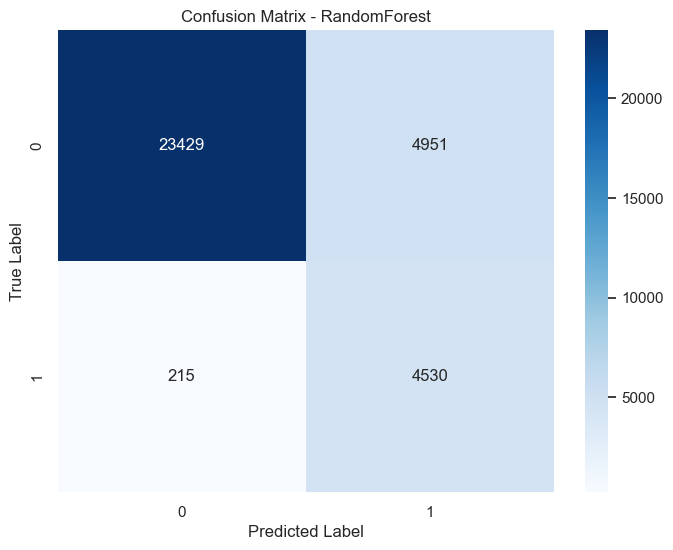


Model: XGBoost

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     28380
           1       0.73      1.00      0.84      4745

    accuracy                           0.95     33125
   macro avg       0.86      0.97      0.91     33125
weighted avg       0.96      0.95      0.95     33125



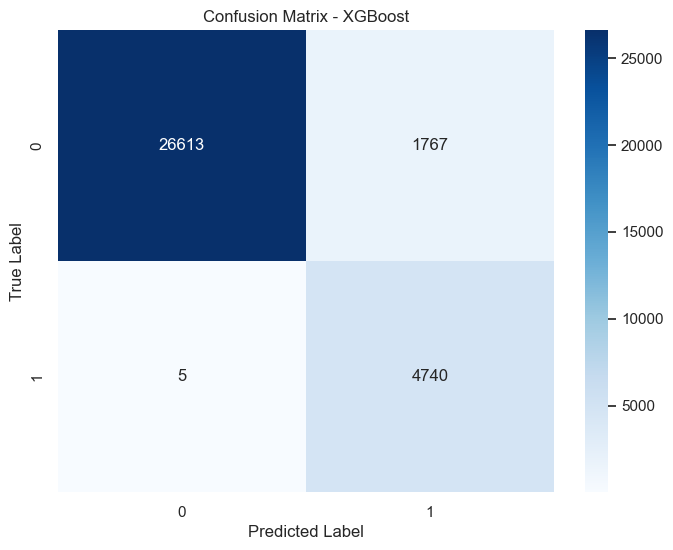


Model: LogisticRegression

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     28380
           1       0.79      0.98      0.88      4745

    accuracy                           0.96     33125
   macro avg       0.89      0.97      0.93     33125
weighted avg       0.97      0.96      0.96     33125



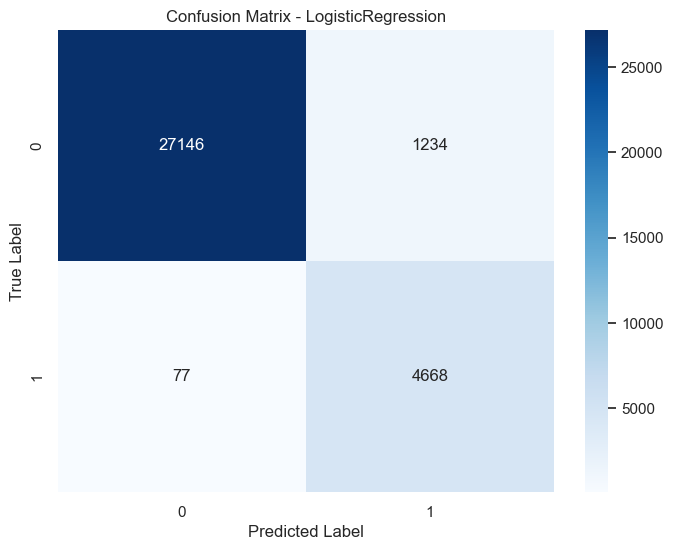


Model: SVM

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     28380
           1       0.75      0.99      0.86      4745

    accuracy                           0.95     33125
   macro avg       0.88      0.97      0.91     33125
weighted avg       0.96      0.95      0.95     33125



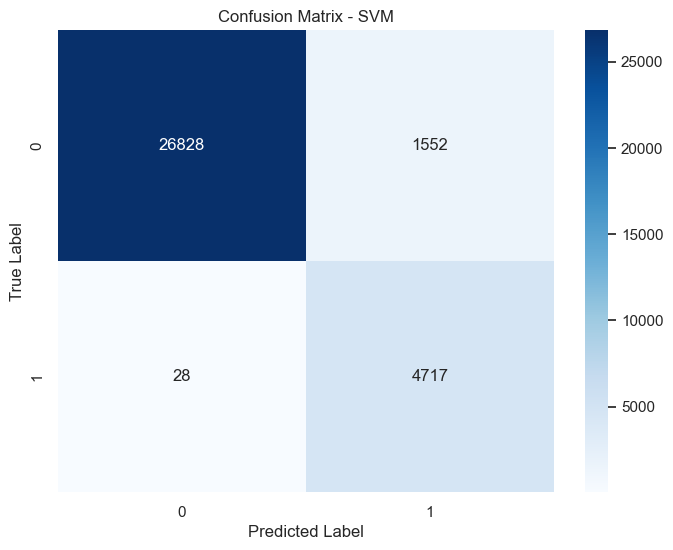

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification reports and confusion matrices for each model on validation set
for name, grid in results.items():
    print(f"\n{'='*50}")
    print(f"Model: {name}")
    print(f"{'='*50}")

    # Get predictions
    y_val_pred = grid.predict(X_val)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_val, y_val_pred))

    # Create and plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [25]:
#last try
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from xgboost import XGBClassifier
from collections import Counter
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Step 1: Filter dataset and drop 'valuePerSecond'
df_filtered = df[df['trustLevel'] <= 2]
X = df_filtered.drop(['fraud', 'valuePerSecond'], axis=1)
y = df_filtered['fraud']

print("Filtered dataset size:", len(df_filtered))
print("Filtered class distribution:", Counter(y))

# Step 2: Proper train/val/test split (60% train, 20% val, 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)  # 0.25 x 0.8 = 0.2

print("Training set size:", len(y_train))
print("Validation set size:", len(y_val))
print("Test set size:", len(y_test))
print("Training class distribution:", Counter(y_train))
print("Validation class distribution:", Counter(y_val))
print("Test class distribution:", Counter(y_test))

# Step 3: Define metrics
scoring = {
    'roc_auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Define models and grids with both class weighting and threshold adjustment
models_and_grids = {
    'RandomForest': {
        'model': RandomForestClassifier(
            class_weight={0: 1, 1: 3},  # Moderate weight for fraud class
            random_state=42,
            oob_score=True,
            bootstrap=True,
            max_samples=0.6,
            max_features='sqrt'
        ),
        'params': {
            'n_estimators': [100],
            'max_depth': [5, 6],
            'min_samples_split': [15, 20],
            'min_samples_leaf': [15, 20],
            'ccp_alpha': [0.02, 0.05]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(
            scale_pos_weight=2,  # Moderate weight for fraud class, make 2 instead
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42,
            subsample=0.6,
            colsample_bytree=0.6
        ),
        'params': {
            'n_estimators': [100],
            'max_depth': [2, 3],
            'learning_rate': [0.01, 0.05],
            'min_child_weight': [3, 5],
            'gamma': [0.1, 0.5],
            'reg_alpha': [0.1, 0.3],
            'reg_lambda': [0.1, 0.3]
        }
    },
    'LogisticRegression': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(
                class_weight={0: 1, 1: 3},  # Moderate weight for fraud class
                max_iter=1000,
                random_state=42,
                solver='saga'
            ))
        ]),
        'params': {
            'clf__C': [0.001, 0.005],
            'clf__penalty': ['l1', 'l2'],
            'clf__l1_ratio': [0.5]
        }
    },
    'SVM': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', SVC(
                class_weight={0: 1, 1: 3},  # Moderate weight for fraud class
                probability=True,
                random_state=42,
                cache_size=1000
            ))
        ]),
        'params': {
            'clf__C': [0.001, 0.005],
            'clf__kernel': ['linear'],
            'clf__gamma': ['scale'],
            'clf__tol': [1e-3]
        }
    }
}

# Step 5: Train models
results = {}

for name, config in models_and_grids.items():
    print(f"\nTraining and tuning {name}...")

    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring=scoring,
        refit='f1',
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    fit_params = config.get('fit_params', {})
    grid.fit(X_train, y_train, **fit_params)
    results[name] = grid

    print(f"Best params for {name}: {grid.best_params_}")
    print("Cross-validation best scores:")
    for metric in scoring:
        score = grid.cv_results_[f'mean_test_{metric}'][grid.best_index_]
        print(f"  {metric}: {score:.4f}")

    y_val_pred = grid.predict(X_val)
    y_val_proba = grid.predict_proba(X_val)[:, 1]

    val_auc = roc_auc_score(y_val, y_val_proba)
    val_f1 = f1_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)

    print(f"Validation scores for {name}:")
    print(f"  ROC AUC: {val_auc:.4f}")
    print(f"  F1: {val_f1:.4f}")
    print(f"  Precision: {val_precision:.4f}")
    print(f"  Recall: {val_recall:.4f}")

# Step 6: Select best model
best_model_name = None
best_val_f1 = 0
final_model = None

for name, grid in results.items():
    y_val_pred = grid.predict(X_val)
    val_f1 = f1_score(y_val, y_val_pred)
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        best_model_name = name
        final_model = grid.best_estimator_

print(f"\nBest model on validation set: {best_model_name} with F1 Score: {best_val_f1:.4f}")

# Step 7: Threshold adjustment
def evaluate_with_threshold(model, X, y, threshold=0.8):
    y_scores = model.predict_proba(X)[:, 1]
    y_pred = (y_scores > threshold).astype(int)

    auc = roc_auc_score(y, y_scores)
    f1 = f1_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)

    return {
        'auc': auc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'threshold': threshold
    }

# Try different thresholds
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
best_threshold = None
best_f1 = 0

print("\nTrying different thresholds on validation set:")
for threshold in thresholds:
    scores = evaluate_with_threshold(final_model, X_val, y_val, threshold)
    print(f"\nThreshold: {threshold}")
    print(f"  F1: {scores['f1']:.4f}")
    print(f"  Precision: {scores['precision']:.4f}")
    print(f"  Recall: {scores['recall']:.4f}")

    if scores['f1'] > best_f1:
        best_f1 = scores['f1']
        best_threshold = threshold

print(f"\nBest threshold: {best_threshold}")
print(f"Best F1 score: {best_f1}")

# Step 8: Final evaluation with best threshold
final_scores = evaluate_with_threshold(final_model, X_test, y_test, best_threshold)
print("\nFinal test set evaluation:")
print(f"  ROC AUC: {final_scores['auc']:.4f}")
print(f"  F1: {final_scores['f1']:.4f}")
print(f"  Precision: {final_scores['precision']:.4f}")
print(f"  Recall: {final_scores['recall']:.4f}")

Filtered dataset size: 165626
Filtered class distribution: Counter({0: 141899, 1: 23727})
Training set size: 99375
Validation set size: 33125
Test set size: 33126
Training class distribution: Counter({0: 85139, 1: 14236})
Validation class distribution: Counter({0: 28380, 1: 4745})
Test class distribution: Counter({0: 28380, 1: 4746})

Training and tuning RandomForest...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best params for RandomForest: {'ccp_alpha': 0.02, 'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 15, 'n_estimators': 100}
Cross-validation best scores:
  roc_auc: 0.9579
  f1: 0.7041
  precision: 0.5789
  recall: 0.8988
Validation scores for RandomForest:
  ROC AUC: 0.9578
  F1: 0.6986
  Precision: 0.5744
  Recall: 0.8913

Training and tuning XGBoost...
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best params for XGBoost: {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'reg_alpha'


Model: RandomForest

ROC AUC Score: 0.9578
F1 Score: 0.6986

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     28380
           1       0.57      0.89      0.70      4745

    accuracy                           0.89     33125
   macro avg       0.78      0.89      0.82     33125
weighted avg       0.92      0.89      0.90     33125



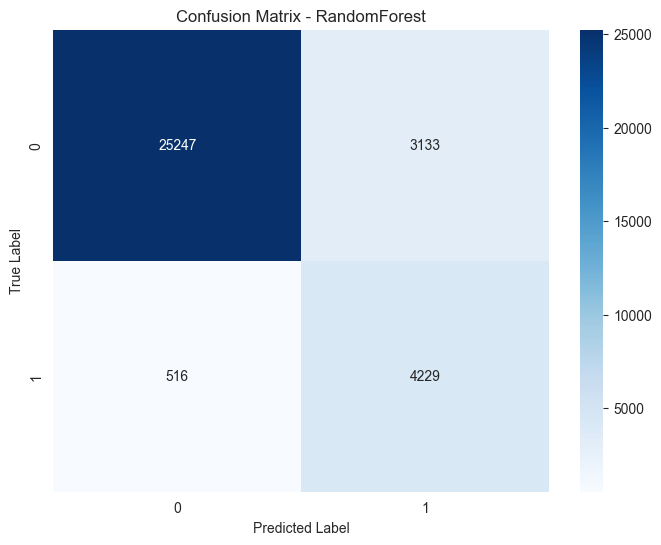


Model: XGBoost

ROC AUC Score: 0.9961
F1 Score: 0.9165

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     28380
           1       0.88      0.96      0.92      4745

    accuracy                           0.97     33125
   macro avg       0.93      0.97      0.95     33125
weighted avg       0.98      0.97      0.98     33125



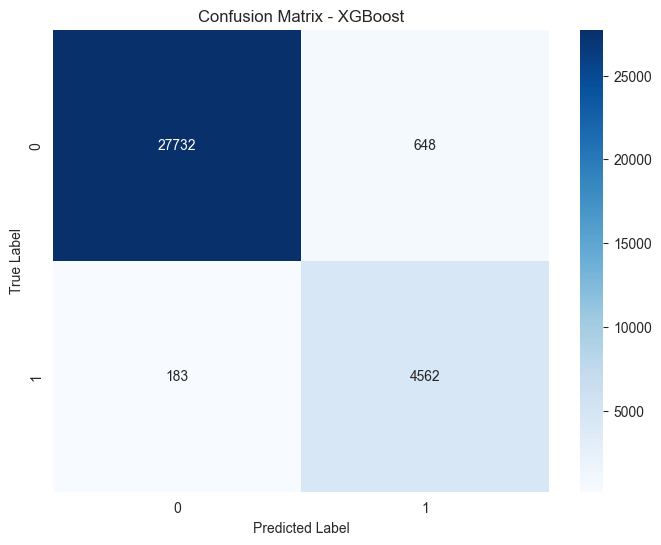


Model: LogisticRegression

ROC AUC Score: 0.9959
F1 Score: 0.8999

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     28380
           1       0.84      0.97      0.90      4745

    accuracy                           0.97     33125
   macro avg       0.92      0.97      0.94     33125
weighted avg       0.97      0.97      0.97     33125



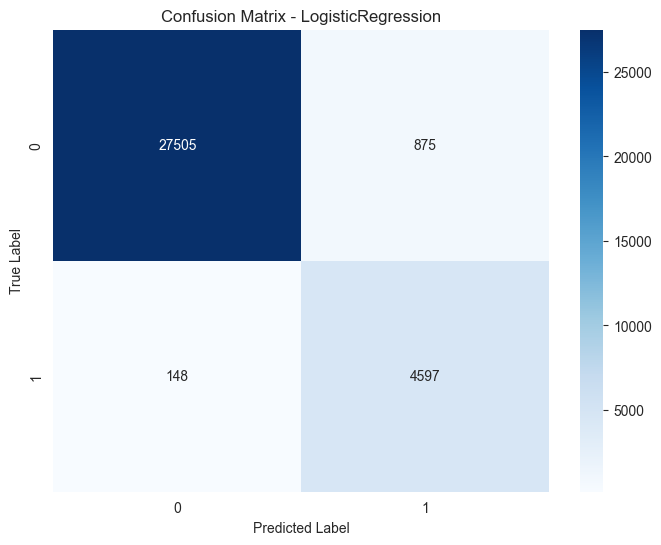


Model: SVM

ROC AUC Score: 0.9960
F1 Score: 0.8904

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     28380
           1       0.82      0.98      0.89      4745

    accuracy                           0.97     33125
   macro avg       0.91      0.97      0.93     33125
weighted avg       0.97      0.97      0.97     33125



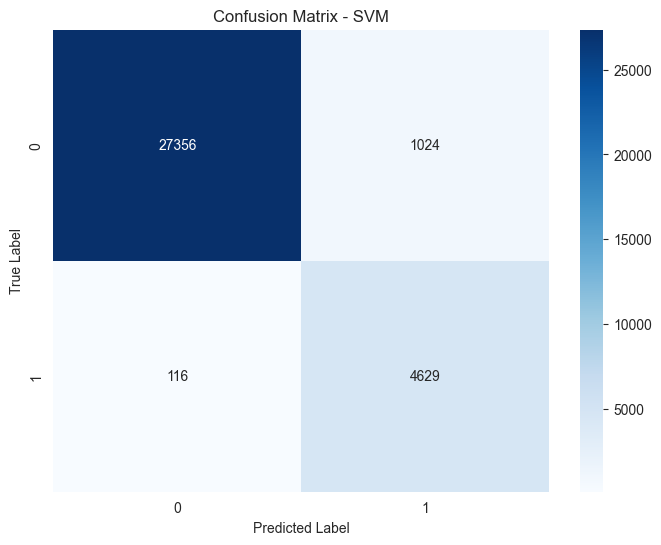

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification reports and confusion matrices for each model on validation set
for name, grid in results.items():
    print(f"\n{'='*50}")
    print(f"Model: {name}")
    print(f"{'='*50}")

    # Get predictions and probabilities
    y_val_pred = grid.predict(X_val)
    y_val_proba = grid.predict_proba(X_val)[:, 1]

    # Calculate additional metrics
    val_auc = roc_auc_score(y_val, y_val_proba)
    val_f1 = f1_score(y_val, y_val_pred)

    # Print metrics
    print(f"\nROC AUC Score: {val_auc:.4f}")
    print(f"F1 Score: {val_f1:.4f}")

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_val, y_val_pred))

    # Create and plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Deployment

In [31]:
# Combine training and validation sets
X_full_train = pd.concat([X_train, X_val])
y_full_train = pd.concat([y_train, y_val])

print("Full training set size:", len(X_full_train))
print("Full training class distribution:", Counter(y_full_train))

# Train the best model (XGBoost) with the best parameters on full dataset
best_params = results['XGBoost'].best_params_
final_xgboost = XGBClassifier(
    scale_pos_weight=2,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    subsample=0.6,
    colsample_bytree=0.6,
    **best_params
)

# Train on full dataset
final_xgboost.fit(X_full_train, y_full_train)

# Evaluate on test set
y_test_pred = final_xgboost.predict(X_test)
y_test_proba = final_xgboost.predict_proba(X_test)[:, 1]

# Calculate metrics
test_auc = roc_auc_score(y_test, y_test_proba)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

print("\nFinal model performance on test set:")
print(f"ROC AUC: {test_auc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")

# Save the final model
import joblib
joblib.dump(final_xgboost, 'final_fraud_model.joblib')

Full training set size: 132500
Full training class distribution: Counter({0: 113519, 1: 18981})

Final model performance on test set:
ROC AUC: 0.9959
F1 Score: 0.9135
Precision: 0.8701
Recall: 0.9614


['final_fraud_model.joblib']